In [2]:
import simplejson

def json_load(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return simplejson.load(f)

In [3]:
from gensim.models.doc2vec import TaggedDocument

def gen_tagged_docs(corpus):
    return [TaggedDocument(doc["words"], doc["tags"]) for doc in corpus]

In [4]:
def display_similar_article_and_categories(corpus, doc_id=0, topn=10, by_article_tokens=True, by_article_tag=False):
    doc = corpus[doc_id].words
    print(' '.join(doc)[:200])

    if by_article_tokens:
        # Using words
        print("************")    
        print("Get simlarity based on tokens:")
        print()    
        inferred_vector = model.infer_vector(doc)
        sims = model.dv.most_similar([inferred_vector], topn=topn)
        for idx, factor in sims:
            print(factor, id_tag_mapping[idx])  

    if by_article_tag:
        # Using doc vector
        print("************")    
        print("Get simlarity based on article tag:")
        print()    
        inferred_vector = model.dv[corpus[doc_id].tags[0]]
        sims = model.dv.most_similar([inferred_vector], topn=topn)
        for idx, factor in sims:
            print(factor, id_tag_mapping[idx])
    
    print("************")
    print("Actual known tags:")
    print()
    print([id_tag_mapping.get(tag) for tag in corpus[doc_id].tags if tag])

In [5]:
import random
import collections
import matplotlib.pyplot as plt


def rank_by_inferredvector(corpus, sent_ids):
    ranks = []
    for sent_id in sent_ids:
        inferred_vector = model.infer_vector(corpus[sent_id].words)
        sims = model.dv.most_similar([inferred_vector], topn=len(id_tag_mapping))
        most_similar_tag_indices = [
            [docid for docid, _ in sims].index(tag)
            for tag in corpus[sent_id].tags if tag
        ]
        if most_similar_tag_indices:
            rank = min(most_similar_tag_indices)
            print(f'{sent_id}: Ranked {rank} ({id_tag_mapping[sims[rank][0]]}) out of {len(sims)}')
            ranks.append(rank)
    return ranks

            
def rank_by_random(corpus, sent_ids):
    return [random.randint(0, len(id_tag_mapping)) for _ in sent_ids]


def plot_matches(corpus, rank_func=rank_by_inferredvector, take_sample=True, sample_size=50, sample_seed=42, topn_perc=0.1):
    if take_sample:
        random.seed(sample_seed)
        sent_ids = random.sample(range(0, len(corpus)), sample_size)
    else:
        sent_ids = list(range(len(corpus)))
    ranks = rank_func(corpus, sent_ids)
    counter = collections.Counter(ranks)
    group_0 = []
    group_1 = []
    group_2 = []
    for k, v in counter.items():
        if k == 0:
            group_0.append(v)
        elif k < len(id_tag_mapping) / (100 / topn_perc):
            group_1.append(v)
        else:
            group_2.append(v)
        sum_0 = sum(group_0)
        sum_1_acceptable = sum(group_1)
        sum_all_else = sum(group_2)
    plt.bar([0,1,2], [sum_0, sum_1_acceptable, sum_all_else])
    print([sum_0, sum_1_acceptable, sum_all_else])
    print('Test example correctly matched (%): ', 100 * sum_0 / sum([sum_0, sum_1_acceptable, sum_all_else]))
    print(f'Test example matched in top {topn_perc}% (%): ', 100 * sum_1_acceptable / sum([sum_0, sum_1_acceptable, sum_all_else]))
    print('Test example badly matched (%): ', 100 * sum_all_else / sum([sum_0, sum_1_acceptable, sum_all_else]))

In [6]:
from gensim.models.doc2vec import Doc2Vec
model = Doc2Vec.load('./doc2vec.model')

In [7]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load('./doc2vec.wv')

In [8]:
corpus_train_raw = json_load('./doc2vec.corpus.train.json')
corpus_test_raw = json_load('./doc2vec.corpus.test.json')

In [8]:
# # dev
# corpus_train_raw = corpus_train_raw[:50]
# corpus_test_raw = corpus_test_raw[:50]

In [9]:
corpus_train = gen_tagged_docs(corpus_train_raw)

In [10]:
tag_id_mapping = json_load('./doc2vec.tag_id_mapping.json')
id_tag_mapping = {v: k for k, v in tag_id_mapping.items()}

41905: Ranked 0 (Pivot Airlines) out of 170620
7296: Ranked 0 (Interstate 422) out of 170620
1639: Ranked 0 (Comedians from New York City) out of 170620
48598: Ranked 0 (Les Moreres (Barcelona Metro)) out of 170620
18024: Ranked 0 (National parks of Quebec) out of 170620
16049: Ranked 0 (Railway stations in the canton of Fribourg) out of 170620
14628: Ranked 0 (Passenger rail transport in China) out of 170620
9144: Ranked 0 (Howrah–Malda Town Intercity Express (via Azimganj)) out of 170620
48265: Ranked 0 (Paris visite) out of 170620
6717: Ranked 0 (Colin Bodill) out of 170620
44348: Ranked 0 (2010 Tara Air Twin Otter crash) out of 170620
48540: Ranked 0 (Bridges over the Kansas River) out of 170620
58469: Ranked 0 (Exelon people) out of 170620
35741: Ranked 9 (Airports in Sweden) out of 170620
5697: Ranked 0 (Kelz Airfield) out of 170620
38698: Ranked 0 (Error detection and correction) out of 170620
27651: Ranked 0 (Travicom) out of 170620
2082: Ranked 0 (DRDO Technology Demonstration

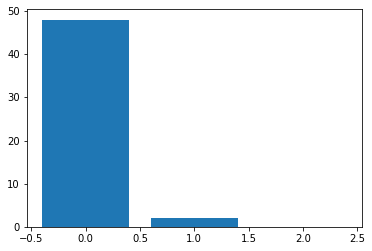

In [12]:
%matplotlib inline
plot_matches(corpus_train)

In [34]:
display_similar_article_and_categories(corpus_train, doc_id=425, by_article_tag=True)

the indore bikaner mahamana express is an express train belonging to western railway zone that runs between indore junction and bikaner junction in india it is currently being operated with train numb
************
Get simlarity based on tokens:

0.6235672235488892 Kharagpur–Purulia Intercity Express
0.6225417852401733 Jaunpur–Rae Bareli Express
0.6225288510322571 Raebareli district
0.6182036995887756 Rourkela–Barbil Intercity Express
0.600604772567749 Dhanbad–Gaya Intercity Express
0.5780624151229858 Yesvantpur–Hassan Intercity Express
0.5638159513473511 Kacheguda–Narkhed Intercity Express
0.5636301636695862 Yesvantpur–Harihar Intercity Express
0.561288058757782 Palanpur–Bhuj Intercity Express
0.5598008036613464 Bidar–Hyderabad Intercity Express
************
Get simlarity based on article tag:

1.0000001192092896 Indore–Bikaner Mahamana Express
0.3080257475376129 Sadbhavna Express (via Faizabad)
0.28578776121139526 Madhya Pradesh State Highway 27
0.28577667474746704 State Highways in M

In [13]:
# Analyse (unseen) test set

In [12]:
corpus_test = gen_tagged_docs(corpus_test_raw)

0: Ranked 0 (Railway lines in North Rhine-Westphalia) out of 170620
1: Ranked 1 (Transport in Geelong) out of 170620
2: Ranked 0 (Airports in New Zealand) out of 170620
3: Ranked 4 (Airports built in the Soviet Union) out of 170620
4: Ranked 1 (19th-century travel writers) out of 170620
5: Ranked 4 (Living people) out of 170620
6: Ranked 2 (Discovery and invention controversies) out of 170620
7: Ranked 0 (Amtrak routes) out of 170620
8: Ranked 2755 (Zambezi Region) out of 170620
9: Ranked 2129 (Aviation in World War II) out of 170620
10: Ranked 503 (Railway stations in Liaoning) out of 170620
11: Ranked 407 (Marshall Space Flight Center) out of 170620
12: Ranked 8 (Food travelogue television series) out of 170620
13: Ranked 19 (Travel technology) out of 170620
14: Ranked 1 (Living people) out of 170620
15: Ranked 0 (Living people) out of 170620
16: Ranked 0 (Aviation television series) out of 170620
17: Ranked 167 (Transportation in Cleveland) out of 170620
18: Ranked 0 (Transportation

140: Ranked 0 (Rail transport magazines published in the United Kingdom) out of 170620
141: Ranked 966 (1892 births) out of 170620
142: Ranked 2 (Little Rock Travelers players) out of 170620
143: Ranked 1 (Roads in Ramanagara district) out of 170620
144: Ranked 7934 (Tourism in the United Arab Emirates) out of 170620
145: Ranked 1617 (USAAF Contract Flying School Airfields) out of 170620
146: Ranked 2552 (Accidents and incidents involving the Lockheed Constellation) out of 170620
147: Ranked 1311 (Tourism in Indonesia) out of 170620
148: Ranked 60 (Express trains in India) out of 170620
149: Ranked 0 (Living people) out of 170620
150: Ranked 24 (Airports in Tocantins) out of 170620
151: Ranked 46 (Types of tourism) out of 170620
152: Ranked 0 (Railway lines in Baden-Württemberg) out of 170620
153: Ranked 0 (Living people) out of 170620
154: Ranked 3 (Bus operators in North Yorkshire) out of 170620
155: Ranked 2 (Airports in Lualaba Province) out of 170620
156: Ranked 1694 (Defunct rail

274: Ranked 42 (Federal highways in Brazil) out of 170620
275: Ranked 0 (Indian travel writers) out of 170620
276: Ranked 0 (Tourism in Paraguay) out of 170620
277: Ranked 840 (Rail transport in the Soviet Union) out of 170620
278: Ranked 0 (Aerial tramways in Japan) out of 170620
279: Ranked 0 (Living people) out of 170620
280: Ranked 1132 (Victims of aviation accidents or incidents in Germany) out of 170620
281: Ranked 0 (Bus stations in London) out of 170620
282: Ranked 3 (German aerospace engineers) out of 170620
283: Ranked 11 (Transportation planning) out of 170620
284: Ranked 0 (Fantasy Flight Games games) out of 170620
285: Ranked 157 (Transport ministers) out of 170620
286: Ranked 39 (Transport in Charlottetown) out of 170620
287: Ranked 0 (Rail transport in New Zealand) out of 170620
288: Ranked 44 (5 ft 6 in gauge railways in India) out of 170620
289: Ranked 318 (1894 births) out of 170620
290: Ranked 318 (Soviet Naval Aviation bases) out of 170620
291: Ranked 929 (Transport

415: Ranked 263 (2007 in spaceflight) out of 170620
416: Ranked 2 (Transport in Kobe) out of 170620
417: Ranked 125 (Airports in French Polynesia) out of 170620
418: Ranked 420 (2016 deaths) out of 170620
419: Ranked 0 (Comics about time travel) out of 170620
420: Ranked 12 (Airports in Sarawak) out of 170620
421: Ranked 3013 (Bicycle transportation planning) out of 170620
422: Ranked 1 (Aviation television series) out of 170620
423: Ranked 1325 (Aerospace companies of China) out of 170620
424: Ranked 84 (Airlines of Iran) out of 170620
425: Ranked 6266 (Transport in Heilongjiang) out of 170620
426: Ranked 37270 (Rail transportation in Illinois) out of 170620
427: Ranked 3658 (Transport in Coventry) out of 170620
428: Ranked 229 (Defunct airlines of Romania) out of 170620
429: Ranked 2 (Type 071 amphibious transport docks) out of 170620
430: Ranked 118 (Shipping companies of Norway) out of 170620
431: Ranked 97 (United States federal transportation legislation) out of 170620
432: Ranke

558: Ranked 44 (Airports in Alabama) out of 170620
559: Ranked 29 (Aviation accidents and incidents in Queensland) out of 170620
560: Ranked 2656 (Cargo airlines) out of 170620
561: Ranked 1 (Airports in West Virginia) out of 170620
562: Ranked 4 (Barcelona Metro line 9 stations) out of 170620
563: Ranked 40 (Shatabdi Express trains) out of 170620
564: Ranked 0 (Airports in Italy) out of 170620
565: Ranked 0 (Arkansas Travelers players) out of 170620
566: Ranked 317 (Transportation in the Philippines) out of 170620
567: Ranked 4290 (Rail transport in Madhya Pradesh) out of 170620
568: Ranked 0 (Iowa Pre-Flight Seahawks football seasons) out of 170620
569: Ranked 139 (Airports in the United Arab Emirates) out of 170620
570: Ranked 14612 (Aerospace system testing) out of 170620
571: Ranked 1873 (1947 deaths) out of 170620
572: Ranked 3175 (Bus transportation in North Dakota) out of 170620
573: Ranked 0 (Bus transportation in Connecticut) out of 170620
574: Ranked 473 (Army aviation) out 

699: Ranked 646 (Airlines established in 2015) out of 170620
700: Ranked 62 (Rail transport in Cumbria) out of 170620
701: Ranked 1091 (London and North Western Railway) out of 170620
703: Ranked 2683 (American female aviators) out of 170620
704: Ranked 131 (1943 deaths) out of 170620
705: Ranked 52 (Express trains in India) out of 170620
706: Ranked 262 (Airports in North Sulawesi) out of 170620
707: Ranked 2 (Aviation divisions of the Soviet Air Forces) out of 170620
708: Ranked 71 (British travel books) out of 170620
709: Ranked 29 (Airports in Hawaii) out of 170620
710: Ranked 0 (Road transport in the Republic of Ireland) out of 170620
711: Ranked 87606 (LGBT tourism) out of 170620
712: Ranked 1279 (Transport in the Arab League) out of 170620
713: Ranked 134 (Certified airports in British Columbia) out of 170620
714: Ranked 56 (Airports in Mozambique) out of 170620
715: Ranked 6921 (Transportation in the San Francisco Bay Area) out of 170620
716: Ranked 6 (Bus rapid transit in Indi

840: Ranked 1021 (2000 deaths) out of 170620
841: Ranked 9 (Transport in Wolverhampton) out of 170620
842: Ranked 1 (Living people) out of 170620
843: Ranked 8 (Metre gauge railways in Germany) out of 170620
844: Ranked 1784 (1951 deaths) out of 170620
846: Ranked 132 (Electric railways in Brazil) out of 170620
847: Ranked 0 (Rail transport in the Republic of the Congo) out of 170620
848: Ranked 1089 (Travel-related organizations) out of 170620
849: Ranked 1 (International travel documents) out of 170620
850: Ranked 19 (Airfields of the United States Army Air Forces in France) out of 170620
851: Ranked 109 (New Jersey transportation-related lists) out of 170620
853: Ranked 332 (17th-century travel writers) out of 170620
854: Ranked 1 (Airports in Sri Lanka) out of 170620
855: Ranked 1778 (1889 births) out of 170620
856: Ranked 4 (Huntsville Flight coaches) out of 170620
857: Ranked 4 (German aerospace engineers) out of 170620
858: Ranked 15 (Named passenger trains of the United States)

982: Ranked 0 (Defunct airlines of the United Kingdom) out of 170620
983: Ranked 9 (Airlines of Senegal) out of 170620
984: Ranked 20794 (S-Bahn in Germany) out of 170620
985: Ranked 3 (Bridges in Kerala) out of 170620
986: Ranked 0 (Transportation in Pittsburgh) out of 170620
987: Ranked 743 (Transport in Valsad) out of 170620
988: Ranked 1970 (Airfields of the United States Army Air Forces in British India) out of 170620
989: Ranked 9 (Films about time travel) out of 170620
990: Ranked 441 (Aviation law) out of 170620
991: Ranked 4045 (Regional airlines of the United States) out of 170620
992: Ranked 28 (Aviation magazines) out of 170620
993: Ranked 2 (Rail transport in the United Arab Emirates) out of 170620
994: Ranked 0 (Convicts transported to Australia) out of 170620
995: Ranked 0 (Aviation television series) out of 170620
996: Ranked 0 (Airports in Sarawak) out of 170620
997: Ranked 35 (Defunct airlines of the United States) out of 170620
998: Ranked 94356 (2010 road incidents)

1123: Ranked 0 (Former Amtrak routes) out of 170620
1124: Ranked 0 (Named passenger trains of the United States) out of 170620
1125: Ranked 26 (Airports in the Cook Islands) out of 170620
1126: Ranked 1813 (Transport companies of Canada) out of 170620
1127: Ranked 10 (Ice in transportation) out of 170620
1128: Ranked 13380 (Transport in Guntakal) out of 170620
1129: Ranked 584 (Transport in İzmir Province) out of 170620
1130: Ranked 2118 (Rail transport publishing companies) out of 170620
1131: Ranked 5 (Living people) out of 170620
1132: Ranked 1 (Bus companies of Australia) out of 170620
1133: Ranked 0 (Auxiliary transport ship classes) out of 170620
1134: Ranked 869 (YouTube travel vloggers) out of 170620
1135: Ranked 1683 (Soyuz uncrewed test flights) out of 170620
1136: Ranked 116147 (Intermodal transport authorities in Canada) out of 170620
1137: Ranked 1107 (Tourism in Thailand) out of 170620
1138: Ranked 0 (Transportation trade unions) out of 170620
1139: Ranked 87 (Airfields o

1260: Ranked 1 (Tram transport in Wales) out of 170620
1261: Ranked 1036 (Transport organizations based in Japan) out of 170620
1262: Ranked 0 (Wikipedia articles incorporating text from the Dictionary of American Naval Aviation Squadrons) out of 170620
1263: Ranked 26 (Rail transport in Scotland) out of 170620
1264: Ranked 33276 (Airports established in 1959) out of 170620
1265: Ranked 128 (Tourism in Macau) out of 170620
1266: Ranked 1 (Rail transport in Derbyshire) out of 170620
1267: Ranked 381 (Airlines established in 1992) out of 170620
1268: Ranked 0 (Aviation accidents and incidents in Indonesia) out of 170620
1269: Ranked 1318 (Members of the Early Birds of Aviation) out of 170620
1270: Ranked 0 (United States World War II army airfields) out of 170620
1271: Ranked 0 (Living people) out of 170620
1272: Ranked 0 (Four-engined tractor aircraft) out of 170620
1273: Ranked 0 (Ministry of War Transport ships) out of 170620
1274: Ranked 0 (Defunct shipping companies of the United Ki

1402: Ranked 0 (CSX Transportation lines) out of 170620
1403: Ranked 364 (Moscow Aviation Institute alumni) out of 170620
1404: Ranked 5736 (2010s British travel television series) out of 170620
1405: Ranked 0 (Tram transport in France) out of 170620
1406: Ranked 116 (Ships of China) out of 170620
1407: Ranked 0 (Airports in Kansas) out of 170620
1408: Ranked 197 (2010s Canadian drama television series) out of 170620
1409: Ranked 1303 (Missing aircraft) out of 170620
1410: Ranked 0 (Transportation in Mindanao) out of 170620
1411: Ranked 9 (Express trains in India) out of 170620
1412: Ranked 0 (Films about time travel) out of 170620
1413: Ranked 0 (Airports in the Philippines) out of 170620
1414: Ranked 0 (Comics about time travel) out of 170620
1415: Ranked 320 (Tourism magazines) out of 170620
1416: Ranked 525 (Closed installations of the United States Army) out of 170620
1417: Ranked 178 (Scenic travelways in Nova Scotia) out of 170620
1418: Ranked 0 (Bus transportation in Ohio) out 

1542: Ranked 0 (Airports in Texas) out of 170620
1543: Ranked 0 (Ministry of War Transport ships) out of 170620
1544: Ranked 11 (Airports in Michigan) out of 170620
1545: Ranked 2850 (Private universities and colleges in Florida) out of 170620
1546: Ranked 0 (Airports in Thailand) out of 170620
1547: Ranked 165 (Airlines established in 2006) out of 170620
1548: Ranked 0 (Ministry of War Transport ships) out of 170620
1549: Ranked 1 (American films) out of 170620
1550: Ranked 0 (Pali district) out of 170620
1551: Ranked 1 (Transport in Charlottetown) out of 170620
1552: Ranked 0 (Companies operating former Southern Pacific Transportation Company lines) out of 170620
1553: Ranked 11 (American travel websites) out of 170620
1554: Ranked 0 (Railway stations in Vijayawada railway division) out of 170620
1555: Ranked 19 (Indian travel writers) out of 170620
1556: Ranked 1 (Road bridges in Scotland) out of 170620
1557: Ranked 0 (Rail transport writers) out of 170620
1558: Ranked 1 (Intermodal

1677: Ranked 4505 (Metre gauge railways in Brazil) out of 170620
1678: Ranked 11937 (Aviation in the United States) out of 170620
1679: Ranked 2 (South Korean time travel television series) out of 170620
1680: Ranked 1227 (Proposed railway lines in California) out of 170620
1681: Ranked 2 (Transport in Kadıköy) out of 170620
1682: Ranked 525 (Rail transport in Tunisia) out of 170620
1683: Ranked 5 (Indian aerospace engineers) out of 170620
1684: Ranked 3612 (Spanish films) out of 170620
1685: Ranked 0 (United States Marine Corps air support squadrons) out of 170620
1686: Ranked 223 (Airport terminals) out of 170620
1687: Ranked 0 (Airports in Florida) out of 170620
1688: Ranked 857 (Airlines of Nepal) out of 170620
1689: Ranked 10 (Airports in Guyana) out of 170620
1690: Ranked 1 (Airports in Troms og Finnmark) out of 170620
1691: Ranked 0 (1067 mm gauge railways in Japan) out of 170620
1692: Ranked 2 (Travel Channel original programming) out of 170620
1693: Ranked 2563 (Victims of avi

1815: Ranked 3143 (1996 deaths) out of 170620
1816: Ranked 1 (Haskell-class attack transports) out of 170620
1817: Ranked 12 (Airports built in the Soviet Union) out of 170620
1818: Ranked 0 (Expressways in Henan) out of 170620
1819: Ranked 21 (Santa Clara Valley Transportation Authority light rail stations) out of 170620
1820: Ranked 662 (Airports in North Rhine-Westphalia) out of 170620
1821: Ranked 0 (Tourism in Jordan) out of 170620
1822: Ranked 2341 (Metroway) out of 170620
1823: Ranked 216 (American films) out of 170620
1824: Ranked 0 (American people in rail transportation) out of 170620
1825: Ranked 25 (Airports in Sud-Ubangi) out of 170620
1826: Ranked 60391 (Trans World Airlines accidents and incidents) out of 170620
1827: Ranked 604 (Aviation magazines) out of 170620
1828: Ranked 513 (Accidents and incidents involving the Antonov An-26) out of 170620
1829: Ranked 0 (Novels about time travel) out of 170620
1830: Ranked 380 (1905 births) out of 170620
1831: Ranked 2 (World War

1949: Ranked 12738 (Transport infrastructure completed in 1988) out of 170620
1950: Ranked 6 (Public transport executives in the United Kingdom) out of 170620
1951: Ranked 12 (Express trains in India) out of 170620
1952: Ranked 11 (Airports in Colombia) out of 170620
1953: Ranked 69 (Express trains in India) out of 170620
1954: Ranked 145 (Transport in Patna) out of 170620
1955: Ranked 2097 (Road transport in Ukraine) out of 170620
1956: Ranked 2 (Airports in Queensland) out of 170620
1957: Ranked 0 (Bus operators in North Yorkshire) out of 170620
1958: Ranked 278 (Travel technology) out of 170620
1959: Ranked 12 (Airports in Mauritania) out of 170620
1960: Ranked 1 (Scottish travel writers) out of 170620
1961: Ranked 177 (Tourism in Serbia) out of 170620
1962: Ranked 21 (Airports in Connecticut) out of 170620
1963: Ranked 0 (Transport proteins) out of 170620
1964: Ranked 50 (Airports in Chile) out of 170620
1965: Ranked 65 (French aerospace engineers) out of 170620
1966: Ranked 0 (Bus

2090: Ranked 1503 (Bridges over the Ohio River) out of 170620
2091: Ranked 30071 (Transport in Thiruvananthapuram) out of 170620
2092: Ranked 0 (Tourism in Northeast India) out of 170620
2093: Ranked 728 (Road transport in Hong Kong) out of 170620
2094: Ranked 1805 (Little Rock Travelers players) out of 170620
2095: Ranked 2 (American aviation films) out of 170620
2096: Ranked 137 (Aviation schools in the United States) out of 170620
2097: Ranked 0 (Films about time travel) out of 170620
2098: Ranked 2 (Defunct bus companies of Norway) out of 170620
2099: Ranked 14 (Airports in Mali) out of 170620
2100: Ranked 189 (Japanese films) out of 170620
2101: Ranked 0 (Aerospace museums in India) out of 170620
2103: Ranked 71 (Dutch systems scientists) out of 170620
2104: Ranked 0 (Defunct airlines of Italy) out of 170620
2105: Ranked 5 (2018 deaths) out of 170620
2106: Ranked 1074 (Aerospace museums in Louisiana) out of 170620
2107: Ranked 82 (Regulation in Singapore) out of 170620
2108: Ranke

2230: Ranked 15 (Heritage railways in New Zealand) out of 170620
2231: Ranked 1 (Individual locomotives of the United States) out of 170620
2232: Ranked 316 (Twin piston-engined tractor aircraft) out of 170620
2233: Ranked 0 (20th-century Dutch politicians) out of 170620
2234: Ranked 1 (Convicts transported to Western Australia) out of 170620
2235: Ranked 0 (Transport in Auckland) out of 170620
2236: Ranked 167 (Little Rock Travelers players) out of 170620
2237: Ranked 190 (National Express companies) out of 170620
2238: Ranked 55 (English travel writers) out of 170620
2239: Ranked 0 (Living people) out of 170620
2240: Ranked 0 (Transportation in the Bronx) out of 170620
2241: Ranked 5821 (Loring Air Force Base) out of 170620
2242: Ranked 115 (Airports with year of establishment missing) out of 170620
2243: Ranked 3383 (1998 deaths) out of 170620
2244: Ranked 0 (Ministry of War Transport ships) out of 170620
2245: Ranked 380 (Transport for London) out of 170620
2246: Ranked 0 (Airports

2364: Ranked 0 (Transport in the Harz) out of 170620
2365: Ranked 0 (Convicts transported to Australia) out of 170620
2366: Ranked 37893 (Short stories adapted into films) out of 170620
2367: Ranked 2 (Video games about time travel) out of 170620
2368: Ranked 0 (Bus transport in Singapore) out of 170620
2369: Ranked 2 (Transport design in London) out of 170620
2370: Ranked 3274 (Aviation accidents and incidents in Germany) out of 170620
2371: Ranked 9 (Former Amtrak routes) out of 170620
2372: Ranked 250 (Accidents and incidents involving the Douglas DC-8) out of 170620
2373: Ranked 168 (Port operating companies) out of 170620
2374: Ranked 0 (Auxiliary transport ship classes) out of 170620
2375: Ranked 12 (Defunct railway companies of India) out of 170620
2376: Ranked 823 (Tourism in Argentina) out of 170620
2377: Ranked 0 (Road transport) out of 170620
2378: Ranked 13 (Airlines of Russia) out of 170620
2379: Ranked 281 (Private spaceflight companies) out of 170620
2380: Ranked 7 (Holy

2504: Ranked 13 (Test spaceflights) out of 170620
2505: Ranked 3 (Combat flight simulators) out of 170620
2506: Ranked 0 (Defunct shipping companies of the United States) out of 170620
2507: Ranked 1258 (Shipping companies of Hong Kong) out of 170620
2508: Ranked 0 (Air shows in the United States) out of 170620
2509: Ranked 0 (Tram transport in England) out of 170620
2510: Ranked 0 (Arkansas Travelers players) out of 170620
2511: Ranked 7 (Transportation in the United States) out of 170620
2512: Ranked 8242 (Buildings and structures in Akita Prefecture) out of 170620
2513: Ranked 1392 (Aerospace companies of the United Kingdom) out of 170620
2514: Ranked 58 (Regional airlines of British Columbia) out of 170620
2515: Ranked 900 (2009 deaths) out of 170620
2516: Ranked 591 (Registered aerodromes in Alberta) out of 170620
2517: Ranked 0 (Road tunnels in Turkey) out of 170620
2518: Ranked 136 (Airports in Vermont) out of 170620
2519: Ranked 2 (Airports in Peru) out of 170620
2520: Ranked 1

2643: Ranked 1 (Railway stations in Seine-Maritime) out of 170620
2644: Ranked 0 (Tourism in Jordan) out of 170620
2645: Ranked 0 (American people in rail transportation) out of 170620
2646: Ranked 1 (Living people) out of 170620
2647: Ranked 0 (Passenger rail transport in China) out of 170620
2648: Ranked 0 (Defunct airlines of the United Kingdom) out of 170620
2649: Ranked 10 (Airports built in the Soviet Union) out of 170620
2650: Ranked 0 (Tourism in Gwynedd) out of 170620
2651: Ranked 67 (21st-century mass murder in Pakistan) out of 170620
2652: Ranked 48 (Airports in Mongolia) out of 170620
2653: Ranked 0 (Ministry of War Transport ships) out of 170620
2654: Ranked 0 (Official tourism regions in Oklahoma) out of 170620
2655: Ranked 14229 (Former CSX Transportation lines) out of 170620
2656: Ranked 1675 (Asansol railway division) out of 170620
2657: Ranked 2 (National highways in India) out of 170620
2658: Ranked 0 (History of transportation in Oregon) out of 170620
2659: Ranked 0

2777: Ranked 1209 (Transport in Port Elizabeth) out of 170620
2778: Ranked 0 (Combat flight simulators) out of 170620
2779: Ranked 1106 (Proposed buildings and structures in Shanghai) out of 170620
2780: Ranked 2450 (Reusable spaceflight technology) out of 170620
2781: Ranked 2 (Airports in East Nusa Tenggara) out of 170620
2782: Ranked 6617 (Transport companies established in 1973) out of 170620
2783: Ranked 3361 (Transport companies established in 1948) out of 170620
2784: Ranked 8 (British travel writers) out of 170620
2785: Ranked 7500 (Rail freight transportation in the United States) out of 170620
2786: Ranked 173 (Express trains in India) out of 170620
2787: Ranked 68 (Airlines established in 2003) out of 170620
2788: Ranked 0 (Spin-offs of CSX Transportation) out of 170620
2789: Ranked 344 (Airports in Algeria) out of 170620
2790: Ranked 0 (Arkansas Travelers players) out of 170620
2791: Ranked 726 (United States naval aviation) out of 170620
2792: Ranked 15 (Passenger rail tra

2910: Ranked 4211 (English civil engineers) out of 170620
2911: Ranked 309 (Roads in England) out of 170620
2912: Ranked 170 (Bombardier Transportation multiple units) out of 170620
2913: Ranked 0 (Airports in Panama) out of 170620
2914: Ranked 9811 (Rail transportation on the National Register of Historic Places) out of 170620
2915: Ranked 0 (Ministers of Transport and Public Works of Finland) out of 170620
2916: Ranked 4 (Kastre Parish) out of 170620
2917: Ranked 0 (Living people) out of 170620
2918: Ranked 27860 (Airports in Essex) out of 170620
2919: Ranked 913 (1966 deaths) out of 170620
2920: Ranked 4 (Airports in Pennsylvania) out of 170620
2921: Ranked 63 (Aviation) out of 170620
2922: Ranked 17 (Planetaria in the United States) out of 170620
2923: Ranked 180 (1898 births) out of 170620
2924: Ranked 4 (Railway stations served by Southeastern) out of 170620
2925: Ranked 2603 (Buildings and structures in Osaka) out of 170620
2926: Ranked 6 (Bus routes in England) out of 170620
29

3043: Ranked 2469 (Transport companies established in 1999) out of 170620
3044: Ranked 0 (Wikipedia articles incorporating text from the Dictionary of American Naval Aviation Squadrons) out of 170620
3045: Ranked 4044 (Installations of the United States Air National Guard) out of 170620
3046: Ranked 38 (Aviation films) out of 170620
3047: Ranked 684 (Flight navigators) out of 170620
3048: Ranked 2970 (Via Rail routes) out of 170620
3049: Ranked 1 (Romanian travel writers) out of 170620
3050: Ranked 0 (Aerospace museums in California) out of 170620
3051: Ranked 100 (2014 deaths) out of 170620
3052: Ranked 0 (Singapore Airlines) out of 170620
3053: Ranked 109 (Airlines established in 2003) out of 170620
3054: Ranked 3 (Motorways in the Netherlands) out of 170620
3055: Ranked 0 (Airports in Texas) out of 170620
3056: Ranked 626 (Companies based in Sydney) out of 170620
3057: Ranked 0 (Freight transport) out of 170620
3058: Ranked 1 (Bicycle sharing companies) out of 170620
3059: Ranked 13

3184: Ranked 1335 (Sustainable tourism) out of 170620
3185: Ranked 9845 (Transportation companies based in Illinois) out of 170620
3186: Ranked 6 (Lists of astronauts) out of 170620
3187: Ranked 1 (Human spaceflight) out of 170620
3188: Ranked 7512 (Public transportation in the United States) out of 170620
3189: Ranked 632 (Aviation awards) out of 170620
3190: Ranked 0 (Living people) out of 170620
3191: Ranked 0 (Aerospace materials) out of 170620
3192: Ranked 24 (Airports in Nevada) out of 170620
3193: Ranked 804 (Philippine travel television series) out of 170620
3194: Ranked 209 (Airport operators) out of 170620
3195: Ranked 43 (Transport in Jersey) out of 170620
3196: Ranked 6778 (Transport in Uganda) out of 170620
3197: Ranked 290 (Tourism in Mexico) out of 170620
3198: Ranked 5 (Airports in Ohio) out of 170620
3199: Ranked 0 (Bus routes in London) out of 170620
3200: Ranked 0 (English-language journals) out of 170620
3201: Ranked 40 (Universities and institutes established in th

3325: Ranked 0 (Rail freight transport in Germany) out of 170620
3326: Ranked 0 (Tourism in Egypt) out of 170620
3327: Ranked 36 (Defunct airlines of Colombia) out of 170620
3328: Ranked 36 (Airports in Chile) out of 170620
3329: Ranked 0 (Arkansas Travelers players) out of 170620
3330: Ranked 0 (Airports in Texas) out of 170620
3331: Ranked 264 (Aviation accidents and incidents in Germany) out of 170620
3332: Ranked 463 (Transport in Delhi) out of 170620
3333: Ranked 3 (1944 ships) out of 170620
3334: Ranked 0 (Passenger rail transport in China) out of 170620
3335: Ranked 47 (Transportation associations in the United States) out of 170620
3336: Ranked 157 (Tourism in Egypt) out of 170620
3337: Ranked 411 (Rail transportation in the United States) out of 170620
3338: Ranked 1064 (Air Transport Auxiliary pilots) out of 170620
3339: Ranked 54 (Cruise lines) out of 170620
3340: Ranked 0 (Space Shuttle missions) out of 170620
3341: Ranked 2 (Bus transportation in Wisconsin) out of 170620
3

3464: Ranked 6 (Ministers of Transport and Communications of Turkey) out of 170620
3465: Ranked 698 (1973 deaths) out of 170620
3466: Ranked 138 (Aviation by year) out of 170620
3467: Ranked 170 (Tourism in Madhya Pradesh) out of 170620
3468: Ranked 25 (Philippine films) out of 170620
3469: Ranked 0 (Airfields of the United States Army Air Forces in Tunisia) out of 170620
3470: Ranked 1523 (Transport in Horta-Guinardó) out of 170620
3471: Ranked 0 (Airports in Venezuela) out of 170620
3472: Ranked 1 (Transport proteins) out of 170620
3473: Ranked 0 (Airfields of the United States Army Air Forces in Florida) out of 170620
3474: Ranked 8 (Airports in Chile) out of 170620
3475: Ranked 2 (2014 deaths) out of 170620
3476: Ranked 1948 (Regional airlines of Atlantic Canada) out of 170620
3477: Ranked 1939 (Leaders of American trade unions) out of 170620
3478: Ranked 2 (Amtrak routes) out of 170620
3480: Ranked 2250 (Medellín Metro) out of 170620
3481: Ranked 715 (Passenger rail transport in S

3604: Ranked 0 (Little Rock Travelers players) out of 170620
3605: Ranked 0 (Railway lines in China) out of 170620
3606: Ranked 12 (Airports in Utah) out of 170620
3607: Ranked 4964 (Transport companies established in 1924) out of 170620
3608: Ranked 1 (Star Trek time travel episodes) out of 170620
3609: Ranked 155 (Hotel chains) out of 170620
3610: Ranked 0 (Songs about aviation) out of 170620
3611: Ranked 4795 (Free transport software) out of 170620
3612: Ranked 887 (Transport in Tehran) out of 170620
3613: Ranked 524 (Registered aerodromes in Ontario) out of 170620
3614: Ranked 0 (Airports in Saudi Arabia) out of 170620
3615: Ranked 3 (British films) out of 170620
3616: Ranked 0 (Living people) out of 170620
3617: Ranked 1 (Airports in Idaho) out of 170620
3618: Ranked 0 (Ministry of War Transport ships) out of 170620
3619: Ranked 0 (SpaceX) out of 170620
3620: Ranked 2 (Kağıthane) out of 170620
3621: Ranked 8 (Airports in Queensland) out of 170620
3622: Ranked 0 (Water transport in

3745: Ranked 1 (Transport proteins) out of 170620
3746: Ranked 109 (Ferries of England) out of 170620
3747: Ranked 424 (Defunct railroads) out of 170620
3748: Ranked 1 (Aviation schools in the United States) out of 170620
3749: Ranked 0 (West Midlands Metro stops) out of 170620
3750: Ranked 472 (Public transportation in the San Fernando Valley) out of 170620
3751: Ranked 0 (Rail transport modelling) out of 170620
3752: Ranked 137 (Airports with year of establishment missing) out of 170620
3753: Ranked 2 (The Night Flight Orchestra albums) out of 170620
3754: Ranked 877 (Rail transport in Assam) out of 170620
3755: Ranked 0 (Airports in Poland) out of 170620
3756: Ranked 0 (Shipyards of Canada) out of 170620
3757: Ranked 220 (Tourism magazines) out of 170620
3758: Ranked 7 (Italian travel writers) out of 170620
3759: Ranked 12 (Films about time travel) out of 170620
3760: Ranked 8 (Transport in Rhineland-Palatinate) out of 170620
3761: Ranked 475 (Aerospace museums in Florida) out of 17

3880: Ranked 0 (Defunct airlines of the United States) out of 170620
3881: Ranked 2 (1944 ships) out of 170620
3882: Ranked 5228 (Transport for London) out of 170620
3883: Ranked 5 (1942 deaths) out of 170620
3884: Ranked 24 (French travel writers) out of 170620
3885: Ranked 11 (Pakistan International Airlines cricketers) out of 170620
3886: Ranked 5421 (1999 deaths) out of 170620
3887: Ranked 0 (Four-engined tractor aircraft) out of 170620
3888: Ranked 0 (Passenger rail transportation in Florida) out of 170620
3889: Ranked 121 (Express trains in India) out of 170620
3890: Ranked 7192 (Indian railway-related lists) out of 170620
3891: Ranked 46 (Defunct airlines of the United States) out of 170620
3892: Ranked 4 (Transit agencies in New Brunswick) out of 170620
3893: Ranked 202 (2007 deaths) out of 170620
3894: Ranked 0 (Living people) out of 170620
3895: Ranked 12 (Airports in West Virginia) out of 170620
3896: Ranked 468 (Airfields of the United States Navy) out of 170620
3897: Ranke

4018: Ranked 0 (Defunct airlines of the United States) out of 170620
4019: Ranked 0 (State tourism development corporations of India) out of 170620
4020: Ranked 300 (Aviation licenses and certifications) out of 170620
4021: Ranked 1 (Travel Channel original programming) out of 170620
4022: Ranked 0 (Ministry of War Transport ships) out of 170620
4023: Ranked 0 (Airports in Japan) out of 170620
4024: Ranked 758 (Airports in South Korea) out of 170620
4025: Ranked 0 (Indian films) out of 170620
4026: Ranked 101 (Closed railway lines in South East England) out of 170620
4027: Ranked 1 (Types of tourism) out of 170620
4028: Ranked 2 (Airports in North Carolina) out of 170620
4029: Ranked 0 (Tourism agencies) out of 170620
4030: Ranked 0 (Airports in the Republic of the Congo) out of 170620
4031: Ranked 72 (1067 mm gauge railways in Japan) out of 170620
4032: Ranked 322 (Airlines established in 2011) out of 170620
4033: Ranked 1001 (Victims of aviation accidents or incidents in Italy) out o

4157: Ranked 66 (Airports built in the Soviet Union) out of 170620
4158: Ranked 17383 (History of transport) out of 170620
4159: Ranked 0 (Aerospace engineering) out of 170620
4160: Ranked 1 (American films) out of 170620
4161: Ranked 1 (Airports in the Republic of Ireland) out of 170620
4162: Ranked 290 (Aviation accidents and incidents in the Soviet Union) out of 170620
4163: Ranked 0 (Rail transport in New Zealand) out of 170620
4164: Ranked 330 (Transport in Hong Kong) out of 170620
4165: Ranked 74 (Express trains in India) out of 170620
4166: Ranked 0 (Airports in Costa Rica) out of 170620
4167: Ranked 1 (Novels about time travel) out of 170620
4168: Ranked 7622 (Transport in Eindhoven) out of 170620
4169: Ranked 143 (Defunct airlines of the United States) out of 170620
4170: Ranked 338 (1940s United States military transport aircraft) out of 170620
4171: Ranked 53 (Express trains in India) out of 170620
4172: Ranked 13 (Rail transport in Peru) out of 170620
4173: Ranked 432 (Road

4295: Ranked 0 (British travel books) out of 170620
4296: Ranked 454 (2006 deaths) out of 170620
4297: Ranked 113243 (Transport infrastructure completed in 1971) out of 170620
4298: Ranked 7976 (Rail transport in China) out of 170620
4299: Ranked 82 (Defunct airlines of the United Kingdom) out of 170620
4300: Ranked 75 (Tram transport) out of 170620
4301: Ranked 0 (Transport design in London) out of 170620
4302: Ranked 1 (Airports in Arkansas) out of 170620
4303: Ranked 35 (Twin piston-engined tractor aircraft) out of 170620
4304: Ranked 0 (Water transport) out of 170620
4305: Ranked 517 (1900 births) out of 170620
4306: Ranked 80 (Airlines established in 2013) out of 170620
4307: Ranked 120 (Movement for Multi-Party Democracy politicians) out of 170620
4308: Ranked 0 (Rail transport in Lincolnshire) out of 170620
4309: Ranked 11 (Rail transport writers) out of 170620
4310: Ranked 0 (Transport in ancient Rome) out of 170620
4311: Ranked 2 (English travel writers) out of 170620
4312: Ra

4432: Ranked 95 (Heliports in the Netherlands) out of 170620
4433: Ranked 262 (Airlines established in 1974) out of 170620
4434: Ranked 0 (1067 mm gauge railways in Japan) out of 170620
4435: Ranked 1 (State Highways in Bihar) out of 170620
4436: Ranked 1 (Short fiction about time travel) out of 170620
4437: Ranked 0 (Bombardier Transportation multiple units) out of 170620
4438: Ranked 48 (British films) out of 170620
4440: Ranked 195 (Airports in Terengganu) out of 170620
4441: Ranked 0 (Aviation magazines) out of 170620
4442: Ranked 31 (Airfields of the United States Army Air Forces in Panama) out of 170620
4443: Ranked 44 (Airports in Gabon) out of 170620
4444: Ranked 0 (Star Trek time travel episodes) out of 170620
4445: Ranked 0 (World War I airfields in France) out of 170620
4446: Ranked 5 (Proposed undersea tunnels in Asia) out of 170620
4447: Ranked 11 (Living people) out of 170620
4448: Ranked 20570 (20th-century American politicians) out of 170620
4449: Ranked 467 (Logistics 

4569: Ranked 1 (Transport in Havana) out of 170620
4570: Ranked 1438 (Transport authorities in France) out of 170620
4571: Ranked 0 (1943 ships) out of 170620
4572: Ranked 2 (Airfields of the VIII Bomber Command in the United Kingdom) out of 170620
4573: Ranked 0 (Airports in Chile) out of 170620
4574: Ranked 476 (Aviation law) out of 170620
4575: Ranked 7468 (Airlines of Chile) out of 170620
4576: Ranked 85 (Airports in New Zealand) out of 170620
4577: Ranked 0 (Passenger rail transportation in Texas) out of 170620
4578: Ranked 0 (Living people) out of 170620
4579: Ranked 53323 (Transport in Espoo) out of 170620
4580: Ranked 0 (Transport in Normandy) out of 170620
4581: Ranked 54 (Airfields of the United States Army Air Forces in Algeria) out of 170620
4582: Ranked 2 (Airports in Chile) out of 170620
4583: Ranked 315 (Railway lines in North West England) out of 170620
4584: Ranked 0 (Indian films) out of 170620
4585: Ranked 13 (Bridges across the River Thames) out of 170620
4586: Rank

4705: Ranked 0 (Aviation accidents and incidents in Indonesia) out of 170620
4706: Ranked 88 (Rail transport in Auckland) out of 170620
4707: Ranked 26 (Airports in Zimbabwe) out of 170620
4708: Ranked 0 (Transportation in New Orleans) out of 170620
4709: Ranked 18987 (Spaceflight health effects) out of 170620
4710: Ranked 1289 (Irish people in rail transport) out of 170620
4711: Ranked 85 (Airlines of Russia) out of 170620
4712: Ranked 2933 (Bus companies of Sweden) out of 170620
4713: Ranked 211 (Airports in Denmark) out of 170620
4714: Ranked 23 (Transport and the European Union) out of 170620
4715: Ranked 4 (Living people) out of 170620
4716: Ranked 0 (1067 mm gauge railways in Japan) out of 170620
4717: Ranked 925 (Travel ticket search engines) out of 170620
4718: Ranked 233 (Defunct cruise lines) out of 170620
4719: Ranked 2 (Defunct public transport operators in the United States) out of 170620
4720: Ranked 0 (Extinct flightless birds) out of 170620
4721: Ranked 2608 (Transport 

4846: Ranked 47 (Rail transport in the Netherlands) out of 170620
4847: Ranked 0 (Living people) out of 170620
4848: Ranked 939 (Transportation in the Philippines) out of 170620
4849: Ranked 5556 (Economics of transport and utility industries) out of 170620
4850: Ranked 0 (Living people) out of 170620
4851: Ranked 15201 (Energy in transport) out of 170620
4852: Ranked 0 (Ministry of War Transport ships) out of 170620
4853: Ranked 0 (Intercity bus companies of Canada) out of 170620
4854: Ranked 525 (Roads in Russia) out of 170620
4855: Ranked 1 (Airlines established in 2013) out of 170620
4856: Ranked 0 (Flight into Egypt in art) out of 170620
4857: Ranked 30364 (Tram transport in Belarus) out of 170620
4858: Ranked 211 (Tram transport in Greater Manchester) out of 170620
4859: Ranked 691 (1983 deaths) out of 170620
4860: Ranked 5 (Accidents and incidents involving the Boeing 707) out of 170620
4861: Ranked 0 (United States Marine Corps air support squadrons) out of 170620
4862: Ranked 

4983: Ranked 0 (Arkansas Travelers players) out of 170620
4984: Ranked 0 (Transport organisations based in Uganda) out of 170620
4985: Ranked 2 (Time travelers) out of 170620
4986: Ranked 917 (Ferry companies of Italy) out of 170620
4987: Ranked 42 (Airlines of Mexico) out of 170620
4988: Ranked 10453 (Energy infrastructure completed in 1984) out of 170620
4989: Ranked 13521 (Defunct airlines of Liberia) out of 170620
4990: Ranked 104 (Trucking companies of the United States) out of 170620
4991: Ranked 0 (Living people) out of 170620
4992: Ranked 1984 (Defunct airfields in India) out of 170620
4993: Ranked 0 (Ministry of War Transport ships) out of 170620
4994: Ranked 4104 (Defunct transport authorities in London) out of 170620
4995: Ranked 15 (Italian travel writers) out of 170620
4996: Ranked 2319 (Transport in New South Wales) out of 170620
4997: Ranked 0 (English travel writers) out of 170620
4998: Ranked 1 (Airports in Ohio) out of 170620
4999: Ranked 8 (Region-owned companies of 

5125: Ranked 9370 (Park and ride schemes in the United Kingdom) out of 170620
5126: Ranked 0 (Roads in England) out of 170620
5127: Ranked 3547 (Defunct airlines of the Philippines) out of 170620
5128: Ranked 1134 (20th-century French women) out of 170620
5129: Ranked 506 (1975 deaths) out of 170620
5130: Ranked 17 (Airports in the Philippines) out of 170620
5131: Ranked 51 (Defunct public transport operators in the United States) out of 170620
5132: Ranked 21 (Aviation accidents and incidents in 2007) out of 170620
5133: Ranked 0 (Living people) out of 170620
5134: Ranked 37 (Airports in Kiribati) out of 170620
5135: Ranked 3 (Karafuto) out of 170620
5136: Ranked 0 (Rail transport films) out of 170620
5137: Ranked 8687 (American travel writers) out of 170620
5138: Ranked 5 (Aviation accidents and incidents in Norway) out of 170620
5139: Ranked 0 (Combat flight simulators) out of 170620
5140: Ranked 365 (1980 deaths) out of 170620
5141: Ranked 1335 (Airlines established in 1997) out of

5263: Ranked 110 (Rail transport in Sweden) out of 170620
5264: Ranked 433 (Transport in Dresden) out of 170620
5265: Ranked 0 (Arkansas Travelers players) out of 170620
5266: Ranked 0 (Passenger rail transport in China) out of 170620
5267: Ranked 164461 (Defunct companies based in Virginia) out of 170620
5268: Ranked 0 (Transport proteins) out of 170620
5269: Ranked 0 (Road transport) out of 170620
5270: Ranked 2381 (Tourism in Scotland) out of 170620
5271: Ranked 8323 (South Africa transport-related lists) out of 170620
5272: Ranked 13781 (Transport buildings and structures in New South Wales) out of 170620
5273: Ranked 4 (Airports in Papua New Guinea) out of 170620
5274: Ranked 1424 (Wingsuit flight deaths) out of 170620
5275: Ranked 3699 (Closed installations of the United States Navy) out of 170620
5276: Ranked 150 (Transport research organizations) out of 170620
5277: Ranked 68 (Australian ship owners) out of 170620
5278: Ranked 8758 (Rail transport in Austria) out of 170620
5279

5397: Ranked 6146 (Airlines established in 1982) out of 170620
5398: Ranked 6 (High-speed railway lines in China) out of 170620
5399: Ranked 373 (Aircraft markings) out of 170620
5400: Ranked 0 (Living people) out of 170620
5401: Ranked 0 (Living people) out of 170620
5402: Ranked 1759 (Transport in Chittagong) out of 170620
5403: Ranked 1008 (1964 deaths) out of 170620
5404: Ranked 11575 (Transportation buildings and structures in Cincinnati) out of 170620
5405: Ranked 2524 (Air sports) out of 170620
5406: Ranked 0 (Indian films) out of 170620
5407: Ranked 16 (Transportation in Atlanta) out of 170620
5408: Ranked 9195 (Transport in Nagaland) out of 170620
5409: Ranked 5097 (Tourism in Chicago) out of 170620
5412: Ranked 859 (Airports in the Solomon Islands) out of 170620
5413: Ranked 35 (Airports in Azerbaijan) out of 170620
5414: Ranked 5246 (Railway stations opened in 2003) out of 170620
5415: Ranked 9117 (Transport in Aberdeen) out of 170620
5416: Ranked 10 (American travel books) 

5538: Ranked 0 (American films) out of 170620
5539: Ranked 2420 (Transport in the United Kingdom) out of 170620
5540: Ranked 2927 (1834 births) out of 170620
5541: Ranked 0 (Living people) out of 170620
5542: Ranked 382 (French films) out of 170620
5543: Ranked 0 (Named passenger trains of the United States) out of 170620
5544: Ranked 1913 (Airlines established in 1968) out of 170620
5545: Ranked 41 (Transport museums in England) out of 170620
5546: Ranked 54 (Share taxis) out of 170620
5547: Ranked 11 (Airports in Ethiopia) out of 170620
5548: Ranked 58 (Ferry transport in England) out of 170620
5549: Ranked 65 (Travel and holiday companies of Australia) out of 170620
5550: Ranked 298 (1889 births) out of 170620
5551: Ranked 12 (American films) out of 170620
5552: Ranked 522 (Transport in Trondheim) out of 170620
5553: Ranked 0 (Airfields of the United States Army Air Forces in the South West Pacific theatre of World War II) out of 170620
5554: Ranked 0 (Airports in Montana) out of 17

5679: Ranked 0 (Transport on the River Thames) out of 170620
5680: Ranked 1 (Films about time travel) out of 170620
5681: Ranked 254 (Companies based in Tallinn) out of 170620
5682: Ranked 201 (Transport buildings and structures in British Columbia) out of 170620
5683: Ranked 0 (Living people) out of 170620
5684: Ranked 2 (Tourism in Bahrain) out of 170620
5685: Ranked 135 (Defunct airports in Massachusetts) out of 170620
5686: Ranked 0 (Electric rail transport) out of 170620
5687: Ranked 37916 (Travel web series) out of 170620
5688: Ranked 11 (Animated films about time travel) out of 170620
5689: Ranked 0 (Airports in Sweden) out of 170620
5690: Ranked 21 (Express trains in India) out of 170620
5691: Ranked 846 (Avinor airports) out of 170620
5692: Ranked 0 (State roads in Croatia) out of 170620
5693: Ranked 0 (Lighthouses in Kerala) out of 170620
5694: Ranked 0 (CSX Transportation lines) out of 170620
5695: Ranked 649 (Transport infrastructure completed in 1970) out of 170620
5696: R

5814: Ranked 1 (Ferry transport in Møre og Romsdal) out of 170620
5815: Ranked 52 (Airports in Algeria) out of 170620
5816: Ranked 301 (Airlines established in 2001) out of 170620
5817: Ranked 801 (Railway lines in Scotland) out of 170620
5818: Ranked 2916 (1987 deaths) out of 170620
5819: Ranked 0 (Extinct flightless birds) out of 170620
5820: Ranked 0 (Living people) out of 170620
5821: Ranked 0 (Little Rock Travelers players) out of 170620
5822: Ranked 8 (Airlines of Vietnam) out of 170620
5823: Ranked 3374 (Transport companies of France) out of 170620
5824: Ranked 10493 (Rail transport in Wales) out of 170620
5825: Ranked 204 (Aviators killed in aviation accidents or incidents in England) out of 170620
5826: Ranked 124 (British films) out of 170620
5827: Ranked 221 (Road tunnels in Switzerland) out of 170620
5828: Ranked 34 (Living people) out of 170620
5829: Ranked 1099 (Airlines established in 1989) out of 170620
5830: Ranked 4298 (Year of death missing) out of 170620
5831: Ranke

5950: Ranked 1 (English travel writers) out of 170620
5951: Ranked 0 (Airports in Costa Rica) out of 170620
5952: Ranked 68 (Baylor Bears football coaches) out of 170620
5953: Ranked 677 (Closed installations of the United States Navy) out of 170620
5954: Ranked 45 (Aerospace companies of the United States) out of 170620
5955: Ranked 2 (Ports and harbors of Japan) out of 170620
5956: Ranked 17 (Airports in Ceará) out of 170620
5957: Ranked 0 (Crosley-class high speed transports) out of 170620
5958: Ranked 146 (Transport economics) out of 170620
5959: Ranked 179 (Aerospace companies of Italy) out of 170620
5960: Ranked 72 (American time travel television series) out of 170620
5961: Ranked 1 (Airfields of the VIII Bomber Command in the United Kingdom) out of 170620
5962: Ranked 1 (Bus transport in Iran) out of 170620
5963: Ranked 1183 (Airports in the Solomon Islands) out of 170620
5964: Ranked 0 (Airports in Bangladesh) out of 170620
5965: Ranked 105 (Transport in Bern) out of 170620
59

6089: Ranked 0 (Airfields of the United States Army Air Forces in Italy) out of 170620
6090: Ranked 0 (Living people) out of 170620
6091: Ranked 407 (Shipping companies of Hong Kong) out of 170620
6092: Ranked 61 (Airports in Iran) out of 170620
6093: Ranked 1899 (Rail transport in Kōchi Prefecture) out of 170620
6094: Ranked 1 (American films) out of 170620
6095: Ranked 9763 (Transport organisations based in Nepal) out of 170620
6096: Ranked 188 (Transportation in Boston) out of 170620
6097: Ranked 1441 (Aircraft leasing companies) out of 170620
6098: Ranked 0 (Living people) out of 170620
6099: Ranked 0 (Airports in Peru) out of 170620
6100: Ranked 0 (Airports in Kyrgyzstan) out of 170620
6101: Ranked 39 (Airliner accidents and incidents caused by pilot error) out of 170620
6102: Ranked 1 (Airlines of New Zealand) out of 170620
6103: Ranked 34 (National Cycle Routes) out of 170620
6104: Ranked 2315 (Railway companies of Indonesia) out of 170620
6105: Ranked 1 (Spaceflight) out of 170

6230: Ranked 0 (Airports in South Sudan) out of 170620
6231: Ranked 19 (Transport in the Arctic) out of 170620
6232: Ranked 2911 (Water transport in British Columbia) out of 170620
6233: Ranked 8 (South Korean time travel television series) out of 170620
6234: Ranked 23 (Vessels involved in the search for Malaysia Airlines Flight 370) out of 170620
6235: Ranked 5 (Airports in Bolivia) out of 170620
6236: Ranked 4 (Living people) out of 170620
6237: Ranked 0 (Rail transport in Wellington) out of 170620
6238: Ranked 420 (Airports in Catalonia) out of 170620
6239: Ranked 2982 (National Film Board of Canada documentaries) out of 170620
6240: Ranked 0 (Airfields of the United States Army Air Forces in Tunisia) out of 170620
6241: Ranked 686 (Airlines established in 1997) out of 170620
6242: Ranked 0 (Airports in North Korea) out of 170620
6243: Ranked 74 (Tourism geography) out of 170620
6244: Ranked 20 (Living people) out of 170620
6245: Ranked 8632 (Airports in the Valencian Community) ou

6363: Ranked 1 (Airports in Missouri) out of 170620
6364: Ranked 0 (Aviation television series) out of 170620
6365: Ranked 928 (Airliner accidents and incidents involving deliberate crashes) out of 170620
6366: Ranked 1384 (San Giorgio-class amphibious transport docks) out of 170620
6367: Ranked 2977 (Transport in Satu Mare) out of 170620
6368: Ranked 0 (Transportation in Philadelphia) out of 170620
6369: Ranked 160 (Express trains in India) out of 170620
6370: Ranked 11 (Living people) out of 170620
6371: Ranked 635 (German World War II flying aces) out of 170620
6372: Ranked 1719 (English cricketers) out of 170620
6373: Ranked 0 (Road transport in Costa Rica) out of 170620
6374: Ranked 1061 (Tourism in Iran) out of 170620
6375: Ranked 0 (Comics about time travel) out of 170620
6376: Ranked 4928 (English male painters) out of 170620
6377: Ranked 8 (Airports in Baja California Sur) out of 170620
6378: Ranked 0 (Transportation in Salt Lake City) out of 170620
6379: Ranked 855 (Transport

6500: Ranked 2252 (Naval aviation operations and battles) out of 170620
6501: Ranked 17 (Express trains in India) out of 170620
6502: Ranked 0 (Novels about time travel) out of 170620
6503: Ranked 1 (Rail transport in Lincolnshire) out of 170620
6504: Ranked 183 (Airports in Ningxia) out of 170620
6505: Ranked 0 (Bus transportation in North Carolina) out of 170620
6506: Ranked 1 (Vertical transport devices) out of 170620
6507: Ranked 126 (Pipeline transport) out of 170620
6508: Ranked 4 (Airports in Bosnia and Herzegovina) out of 170620
6509: Ranked 89 (Tourism in Namibia) out of 170620
6510: Ranked 177 (Airports in Xinjiang) out of 170620
6511: Ranked 0 (Living people) out of 170620
6512: Ranked 189 (Defunct airlines of Canada) out of 170620
6513: Ranked 1586 (Transport in Dresden) out of 170620
6514: Ranked 0 (Heritage railway stations in Kent) out of 170620
6515: Ranked 44 (Airports in Veneto) out of 170620
6516: Ranked 125 (Defunct airlines of the United States) out of 170620
6517:

6634: Ranked 19 (Living people) out of 170620
6635: Ranked 8831 (CITIC Group) out of 170620
6636: Ranked 146 (Government-owned airlines) out of 170620
6637: Ranked 7 (Spacecraft launched in 1985) out of 170620
6638: Ranked 121 (1957 deaths) out of 170620
6639: Ranked 0 (Goddard Space Flight Center) out of 170620
6640: Ranked 695 (Little Rock Travelers players) out of 170620
6641: Ranked 17 (Express trains in India) out of 170620
6642: Ranked 444 (Defunct airlines of Libya) out of 170620
6643: Ranked 8 (Aviation competitions and awards) out of 170620
6644: Ranked 231 (Transport in Jaipur) out of 170620
6645: Ranked 156 (Transportation in the United States) out of 170620
6646: Ranked 1793 (Transport in Sardinia) out of 170620
6647: Ranked 0 (Living people) out of 170620
6648: Ranked 77155 (Airports established in 1939) out of 170620
6649: Ranked 1 (Freight transport) out of 170620
6650: Ranked 12 (Express trains in India) out of 170620
6651: Ranked 0 (Railway stations in Vijayawada railw

6779: Ranked 286 (Transportation buildings and structures on the National Register of Historic Places in Oregon) out of 170620
6780: Ranked 20 (Transport in Rwanda) out of 170620
6781: Ranked 46 (Manchester Metrolink) out of 170620
6782: Ranked 258 (Freight transport) out of 170620
6783: Ranked 271 (Australian people in rail transport) out of 170620
6784: Ranked 0 (Proposed airports in India) out of 170620
6785: Ranked 0 (Tyne and Wear Metro Yellow line stations) out of 170620
6786: Ranked 18 (Transport in Somalia) out of 170620
6787: Ranked 1 (Works about rail transport) out of 170620
6788: Ranked 28 (Aerospace Defense Command military installations) out of 170620
6789: Ranked 0 (Aviation accidents and incidents in Russia) out of 170620
6790: Ranked 1 (Water transport in Denmark) out of 170620
6791: Ranked 11 (Tourism in Sweden) out of 170620
6792: Ranked 0 (History of rail transport in Italy) out of 170620
6793: Ranked 0 (Railway stations in Kutch district) out of 170620
6794: Ranked

6918: Ranked 1 (Airports in Finland) out of 170620
6919: Ranked 6 (Airports in Indiana) out of 170620
6920: Ranked 9 (Transport in Bergen) out of 170620
6921: Ranked 1742 (1969 deaths) out of 170620
6922: Ranked 0 (Wikipedia articles incorporating text from the Dictionary of American Naval Aviation Squadrons) out of 170620
6923: Ranked 0 (Defunct airlines of Russia) out of 170620
6924: Ranked 689 (Documentary films about rail transport) out of 170620
6925: Ranked 1056 (Road junctions in England) out of 170620
6926: Ranked 18 (Transport in Sardinia) out of 170620
6927: Ranked 33 (Military aviation occupations) out of 170620
6928: Ranked 420 (Ministers of Transport and Water Management of the Netherlands) out of 170620
6929: Ranked 259 (Transport companies of France) out of 170620
6930: Ranked 0 (Airports in Greece) out of 170620
6931: Ranked 82 (Aviation schools) out of 170620
6932: Ranked 1563 (Tourism in Italy) out of 170620
6933: Ranked 1905 (1940 deaths) out of 170620
6934: Ranked 5

7056: Ranked 10375 (2007 establishments in Australia) out of 170620
7057: Ranked 1 (Buildings and structures in Terengganu) out of 170620
7058: Ranked 106 (Air navigation service providers) out of 170620
7059: Ranked 4320 (Sampark Kranti Express trains) out of 170620
7060: Ranked 69 (1944 ships) out of 170620
7061: Ranked 2992 (Rail transportation in the United States) out of 170620
7062: Ranked 543 (Airlines established in 2006) out of 170620
7063: Ranked 1241 (1962 in spaceflight) out of 170620
7064: Ranked 23 (Aerospace museums in Germany) out of 170620
7065: Ranked 1 (Transport ships of the United States Army) out of 170620
7066: Ranked 237 (Missions to Venus) out of 170620
7067: Ranked 2897 (1944 deaths) out of 170620
7068: Ranked 11 (Airlines established in 1991) out of 170620
7069: Ranked 5 (Nuttalls) out of 170620
7070: Ranked 247 (Rail transport in Thessaly) out of 170620
7071: Ranked 41141 (Railway stations in the United States opened in 2017) out of 170620
7072: Ranked 1145 

7192: Ranked 269 (Transport in Daugavpils) out of 170620
7193: Ranked 1 (Closed railway lines in the East of England) out of 170620
7194: Ranked 206 (Airports in Rhineland-Palatinate) out of 170620
7195: Ranked 473 (1757 births) out of 170620
7196: Ranked 7 (Defunct airlines of New Zealand) out of 170620
7197: Ranked 1 (Living people) out of 170620
7198: Ranked 806 (Airports in Nouvelle-Aquitaine) out of 170620
7199: Ranked 1888 (1944 deaths) out of 170620
7200: Ranked 6 (Bus transport in Iran) out of 170620
7201: Ranked 3 (Airports in Minnesota) out of 170620
7202: Ranked 0 (Video games about time travel) out of 170620
7203: Ranked 1 (Novels about time travel) out of 170620
7204: Ranked 659 (Transport in Asturias) out of 170620
7205: Ranked 42 (Airports in Argentina) out of 170620
7206: Ranked 38 (Express trains in India) out of 170620
7207: Ranked 0 (Ferry transport in England) out of 170620
7208: Ranked 20 (Aviation accidents and incidents in Scotland) out of 170620
7209: Ranked 1 (

7333: Ranked 389 (Airlines established in 2003) out of 170620
7334: Ranked 2 (Certified airports in the Kitikmeot Region) out of 170620
7335: Ranked 31 (Airports in Nicaragua) out of 170620
7336: Ranked 13 (1067 mm gauge railways in Japan) out of 170620
7337: Ranked 8 (17th-century travelers) out of 170620
7338: Ranked 28 (Transport in Kelowna) out of 170620
7339: Ranked 0 (Intelsat satellites) out of 170620
7340: Ranked 44 (Proposed roads) out of 170620
7341: Ranked 0 (Transport in Auvergne-Rhône-Alpes) out of 170620
7342: Ranked 0 (English travel writers) out of 170620
7343: Ranked 0 (Novels about time travel) out of 170620
7344: Ranked 41 (Airports in Bolivia) out of 170620
7345: Ranked 63 (Aviation accidents and incidents in 2009) out of 170620
7346: Ranked 7 (Accidents and incidents involving the Lockheed Constellation) out of 170620
7347: Ranked 716 (Aerospace museums in Florida) out of 170620
7348: Ranked 5495 (Railroad tunnels in Virginia) out of 170620
7349: Ranked 9 (Defunct 

7469: Ranked 0 (Airports in Texas) out of 170620
7470: Ranked 6 (Defunct airlines of the Netherlands Antilles) out of 170620
7471: Ranked 139 (Tram transport) out of 170620
7472: Ranked 0 (Aviation television series) out of 170620
7473: Ranked 11 (Bus stations in Uttar Pradesh) out of 170620
7474: Ranked 37 (Airlines established in 2004) out of 170620
7475: Ranked 7 (Airports in South Carolina) out of 170620
7476: Ranked 1 (Scottish travel writers) out of 170620
7477: Ranked 3197 (World War II flight simulation video games) out of 170620
7478: Ranked 896 (Transport in Durgapur) out of 170620
7479: Ranked 24 (Transport in Walsall) out of 170620
7480: Ranked 0 (History of rail transport in Morocco) out of 170620
7481: Ranked 0 (Tram transport in England) out of 170620
7482: Ranked 27 (Locomotive manufacturers of Germany) out of 170620
7483: Ranked 1790 (Defunct airlines of the Comoros) out of 170620
7484: Ranked 0 (Rail transport in Gloucestershire) out of 170620
7485: Ranked 0 (Airports

7604: Ranked 0 (Road transport in Costa Rica) out of 170620
7605: Ranked 34 (Airports in Bolivia) out of 170620
7606: Ranked 13 (Airports in Michigan) out of 170620
7607: Ranked 210 (Norwegian travel writers) out of 170620
7608: Ranked 280 (Aviation in China) out of 170620
7609: Ranked 37 (British travel books) out of 170620
7610: Ranked 2281 (1942 deaths) out of 170620
7611: Ranked 3 (Spaceflight concepts) out of 170620
7612: Ranked 1721 (Aviation accidents and incidents in 2007) out of 170620
7613: Ranked 218 (Canadian travel books) out of 170620
7614: Ranked 0 (Flightless birds) out of 170620
7615: Ranked 18 (Express trains in India) out of 170620
7616: Ranked 2 (Transmembrane transporters) out of 170620
7617: Ranked 3 (Transportation in Pittsburgh) out of 170620
7618: Ranked 748 (Airports in Western Australia) out of 170620
7619: Ranked 0 (Passenger rail transport in Indonesia) out of 170620
7620: Ranked 1 (Video games about time travel) out of 170620
7621: Ranked 1351 (Road transp

7742: Ranked 0 (Cultural depictions of Idi Amin) out of 170620
7743: Ranked 1 (Combat flight simulators) out of 170620
7744: Ranked 0 (Songs about aviation) out of 170620
7745: Ranked 522 (Spaceflight by year) out of 170620
7746: Ranked 0 (Airports in New South Wales) out of 170620
7747: Ranked 997 (Transport in Heilongjiang) out of 170620
7748: Ranked 0 (Companies based in Panama City) out of 170620
7749: Ranked 304 (Rapid transit lines in China) out of 170620
7750: Ranked 0 (Defunct airlines of the United Kingdom) out of 170620
7751: Ranked 1520 (Flight training) out of 170620
7752: Ranked 0 (Water transport in Finland) out of 170620
7753: Ranked 3 (Railway lines in Scotland) out of 170620
7754: Ranked 9 (Travel writing) out of 170620
7755: Ranked 0 (Airports in Jordan) out of 170620
7756: Ranked 1160 (Aviation safety) out of 170620
7757: Ranked 46 (1944 ships) out of 170620
7758: Ranked 1 (Films about time travel) out of 170620
7759: Ranked 168 (Airports in Austria) out of 170620
77

7880: Ranked 4 (Airports in Louisiana) out of 170620
7881: Ranked 2 (American films) out of 170620
7882: Ranked 656 (American people in rail transportation) out of 170620
7883: Ranked 162 (Airlines established in 2007) out of 170620
7884: Ranked 0 (Bus companies of New South Wales) out of 170620
7885: Ranked 3 (Airports in Minnesota) out of 170620
7886: Ranked 2543 (Japan Airlines) out of 170620
7887: Ranked 7 (Aviation safety) out of 170620
7888: Ranked 1387 (Airlines of South Africa) out of 170620
7889: Ranked 1 (English travel writers) out of 170620
7890: Ranked 0 (Merced River) out of 170620
7891: Ranked 339 (Education in Pasay) out of 170620
7892: Ranked 36362 (Airports established in 1928) out of 170620
7893: Ranked 16782 (Transportation in Quezon) out of 170620
7894: Ranked 0 (Tram transport in England) out of 170620
7895: Ranked 0 (Electric rail transport) out of 170620
7896: Ranked 55 (2017 establishments in China) out of 170620
7897: Ranked 25 (Living people) out of 170620
78

8022: Ranked 1722 (Airports in Slovakia) out of 170620
8023: Ranked 0 (Travel books) out of 170620
8024: Ranked 0 (Named passenger trains of the United States) out of 170620
8025: Ranked 2 (Films about time travel) out of 170620
8026: Ranked 1446 (Bus transportation in Oklahoma) out of 170620
8027: Ranked 1 (Airports built in the Soviet Union) out of 170620
8028: Ranked 0 (Aviation security) out of 170620
8029: Ranked 0 (Crewed Soyuz missions) out of 170620
8030: Ranked 0 (World War II auxiliary ships of the United States) out of 170620
8031: Ranked 0 (Airports built in the Soviet Union) out of 170620
8032: Ranked 1223 (Aviation accidents and incidents in Chile) out of 170620
8033: Ranked 5 (Penn Central Transportation) out of 170620
8034: Ranked 1 (Victims of aviation accidents or incidents in the United States) out of 170620
8035: Ranked 204 (Transport in Milan) out of 170620
8037: Ranked 0 (Transport in Auvergne-Rhône-Alpes) out of 170620
8038: Ranked 154 (Metre gauge railways in Ge

8160: Ranked 58 (Bus transportation in Ohio) out of 170620
8161: Ranked 2 (Airlines established in 1991) out of 170620
8162: Ranked 0 (Living people) out of 170620
8163: Ranked 7184 (American aviation record holders) out of 170620
8164: Ranked 553 (Transport in the Regional Municipality of Wood Buffalo) out of 170620
8165: Ranked 0 (Ministry of War Transport ships) out of 170620
8166: Ranked 0 (Airports in Costa Rica) out of 170620
8167: Ranked 4966 (2010s time travel television series) out of 170620
8168: Ranked 36 (Transport in Chengdu) out of 170620
8169: Ranked 1 (Test spaceflights) out of 170620
8170: Ranked 1087 (Defunct airlines of Peru) out of 170620
8171: Ranked 0 (750 mm gauge railways in Kazakhstan) out of 170620
8172: Ranked 89 (Airlines established in 1966) out of 170620
8173: Ranked 496 (Transport in Brighton and Hove) out of 170620
8174: Ranked 419 (Certified airports in Alberta) out of 170620
8175: Ranked 37 (Container shipping companies) out of 170620
8176: Ranked 1 (A

8296: Ranked 324 (Airlines established in 1971) out of 170620
8297: Ranked 0 (Transports of the United States Navy) out of 170620
8298: Ranked 0 (United States World War II army airfields) out of 170620
8299: Ranked 13 (Tourism in Sweden) out of 170620
8300: Ranked 621 (Transport in Hainan) out of 170620
8301: Ranked 13 (Bus transportation in Maryland) out of 170620
8302: Ranked 91 (Railway tunnels in Switzerland) out of 170620
8303: Ranked 155 (Airliner accidents and incidents involving controlled flight into terrain) out of 170620
8304: Ranked 1814 (1935 deaths) out of 170620
8305: Ranked 0 (Rail transport in North Yorkshire) out of 170620
8306: Ranked 15 (Airports in the Solomon Islands) out of 170620
8307: Ranked 799 (Passenger rail transport) out of 170620
8308: Ranked 0 (Rail transport in Ehime Prefecture) out of 170620
8309: Ranked 1 (Defunct airlines of the United States) out of 170620
8310: Ranked 13 (Express trains in India) out of 170620
8311: Ranked 2 (Living people) out of

8434: Ranked 0 (Aviation in World War I) out of 170620
8435: Ranked 377 (Logistics companies of the United States) out of 170620
8436: Ranked 256 (Express trains in India) out of 170620
8437: Ranked 155 (Canadian travel writers) out of 170620
8438: Ranked 1 (Airports in Florida) out of 170620
8439: Ranked 0 (Airports in Panama) out of 170620
8440: Ranked 0 (Microsatellites) out of 170620
8441: Ranked 2 (Defunct airports in Brazil) out of 170620
8442: Ranked 29 (2008 deaths) out of 170620
8443: Ranked 0 (Defunct airlines of the United Kingdom) out of 170620
8444: Ranked 55 (Airlines established in 2018) out of 170620
8445: Ranked 16 (Victims of aviation accidents or incidents in the United States) out of 170620
8446: Ranked 6 (Living people) out of 170620
8447: Ranked 0 (1067 mm gauge railways in Japan) out of 170620
8448: Ranked 33 (Disambig-Class London Transport articles) out of 170620
8449: Ranked 1 (Transport in Saxony) out of 170620
8450: Ranked 40 (Airlines established in 2010) o

8572: Ranked 51 (Transport in Kolkata) out of 170620
8573: Ranked 19679 (1966 disestablishments in Scotland) out of 170620
8574: Ranked 0 (Transportation in Philadelphia) out of 170620
8575: Ranked 11 (Spaceflight) out of 170620
8576: Ranked 1262 (Transport) out of 170620
8577: Ranked 60886 (Transport in Charleroi) out of 170620
8578: Ranked 3 (Bus transportation in Wisconsin) out of 170620
8579: Ranked 817 (Los Angeles Metro Busway stations) out of 170620
8580: Ranked 405 (Bus transportation in Pennsylvania) out of 170620
8581: Ranked 0 (Travel guide books) out of 170620
8582: Ranked 3 (Films about time travel) out of 170620
8583: Ranked 0 (Arkansas Travelers players) out of 170620
8584: Ranked 1 (Living people) out of 170620
8585: Ranked 87 (Transportation planning) out of 170620
8586: Ranked 20 (Bus transport in Bangkok) out of 170620
8587: Ranked 428 (Transportation in Pittsburgh) out of 170620
8588: Ranked 2600 (Tourism in Indonesia) out of 170620
8589: Ranked 3579 (Transport in T

8712: Ranked 0 (Transport in Norfolk) out of 170620
8713: Ranked 1531 (Low-wing aircraft) out of 170620
8714: Ranked 12 (Airports in Niger) out of 170620
8715: Ranked 52 (Express trains in India) out of 170620
8716: Ranked 753 (Accidents and incidents involving the Douglas DC-6) out of 170620
8717: Ranked 22 (Rail transport in Western Australia) out of 170620
8718: Ranked 0 (Rail transport in Paris) out of 170620
8719: Ranked 0 (Slow and fast passenger trains in India) out of 170620
8720: Ranked 0 (Aerospace museums in Norway) out of 170620
8721: Ranked 1 (Airports in Colombia) out of 170620
8722: Ranked 0 (State roads in Croatia) out of 170620
8723: Ranked 3529 (Transport in Zonguldak Province) out of 170620
8724: Ranked 42784 (Animal welfare) out of 170620
8725: Ranked 18 (Kavi Guru Express trains) out of 170620
8726: Ranked 0 (1944 ships) out of 170620
8727: Ranked 0 (English Football League players) out of 170620
8728: Ranked 0 (Rail transport in Norfolk) out of 170620
8729: Ranked

8855: Ranked 1 (American travel books) out of 170620
8856: Ranked 335 (Airlines established in 2014) out of 170620
8857: Ranked 221 (Transport in Indore) out of 170620
8858: Ranked 0 (ATP-binding cassette transporters) out of 170620
8859: Ranked 741 (Aviation accidents and incidents in Mexico) out of 170620
8860: Ranked 0 (Convicts transported to Western Australia) out of 170620
8861: Ranked 0 (Transport in Waikato) out of 170620
8862: Ranked 318 (United States railroad regulation) out of 170620
8863: Ranked 4256 (1942 deaths) out of 170620
8864: Ranked 0 (Rail transport in Lincolnshire) out of 170620
8865: Ranked 181 (Airports in Italy) out of 170620
8866: Ranked 0 (Novels about time travel) out of 170620
8867: Ranked 1698 (Defunct California railroads) out of 170620
8868: Ranked 520 (Transport culture) out of 170620
8869: Ranked 0 (Airports in Mississippi) out of 170620
8870: Ranked 903 (1986 deaths) out of 170620
8871: Ranked 2966 (Aviation organizations based in the United States) 

8991: Ranked 0 (Tram depots in Melbourne) out of 170620
8992: Ranked 245 (Airports in Poland) out of 170620
8993: Ranked 0 (Novels about time travel) out of 170620
8994: Ranked 0 (Roads in England) out of 170620
8995: Ranked 0 (Tourism in Kerala) out of 170620
8996: Ranked 365 (Rail transport in Staffordshire) out of 170620
8997: Ranked 7825 (Aerospace companies of Canada) out of 170620
8998: Ranked 4 (Airports in Missouri) out of 170620
8999: Ranked 0 (Ministry of War Transport ships) out of 170620
9000: Ranked 150 (World War II aircraft of the United States) out of 170620
9001: Ranked 12 (Aerospace companies of the United States) out of 170620
9002: Ranked 0 (Airfields of the United States Army Air Forces in France) out of 170620
9003: Ranked 5 (Ministers of Transport of Israel) out of 170620
9004: Ranked 551 (Railway workshops in India) out of 170620
9005: Ranked 7 (BBC television documentaries) out of 170620
9006: Ranked 3567 (1916 births) out of 170620
9007: Ranked 4 (Airports in 

9128: Ranked 50 (Named passenger trains of the United States) out of 170620
9129: Ranked 0 (Living people) out of 170620
9130: Ranked 22804 (Passenger rail transport in British Columbia) out of 170620
9131: Ranked 13 (Airports in Jakarta) out of 170620
9132: Ranked 2138 (Airliner accidents and incidents caused by pilot error) out of 170620
9133: Ranked 3504 (Rail transport writers) out of 170620
9134: Ranked 5 (Funicular railways in Switzerland) out of 170620
9135: Ranked 55 (Airports in Poland) out of 170620
9136: Ranked 414 (Discovery and invention controversies) out of 170620
9137: Ranked 7 (Aviation in the Pacific Ocean) out of 170620
9138: Ranked 0 (Rail transport in Hokkaido) out of 170620
9139: Ranked 2 (Rail transport operations) out of 170620
9140: Ranked 140 (Stagecoach stations on the National Register of Historic Places in Nevada) out of 170620
9141: Ranked 6 (Airliner accidents and incidents involving controlled flight into terrain) out of 170620
9142: Ranked 2 (Airports i

9269: Ranked 1032 (Airlines established in 2000) out of 170620
9270: Ranked 0 (Road transport in Japan) out of 170620
9271: Ranked 44 (Seaplane bases in Ontario) out of 170620
9272: Ranked 511 (Proposed railway lines in California) out of 170620
9273: Ranked 502 (Road transport in Tianjin) out of 170620
9274: Ranked 239 (Stagecoach stations on the National Register of Historic Places) out of 170620
9275: Ranked 0 (Ferry transport in Sydney) out of 170620
9276: Ranked 609 (Rail transport in Devon) out of 170620
9277: Ranked 2 (Films about time travel) out of 170620
9278: Ranked 0 (Dutch footballers) out of 170620
9279: Ranked 358 (Aviation companies) out of 170620
9280: Ranked 0 (Convicts transported to Australia) out of 170620
9281: Ranked 64 (English travel writers) out of 170620
9282: Ranked 0 (Transport in Hesse) out of 170620
9283: Ranked 5 (Time travelers) out of 170620
9284: Ranked 0 (Airports in Mozambique) out of 170620
9285: Ranked 34 (Transport companies of Russia) out of 170

9410: Ranked 0 (Tram transport in England) out of 170620
9411: Ranked 0 (Living people) out of 170620
9412: Ranked 6285 (1932 deaths) out of 170620
9413: Ranked 0 (Living people) out of 170620
9414: Ranked 105 (Bus transportation in Massachusetts) out of 170620
9415: Ranked 2566 (British aviation films) out of 170620
9416: Ranked 209 (Vertical transport devices) out of 170620
9417: Ranked 9 (American films) out of 170620
9418: Ranked 2 (Semi-Automatic Ground Environment sites) out of 170620
9419: Ranked 47 (Victims of aviation accidents or incidents in 1981) out of 170620
9420: Ranked 0 (Dnepropetrovsk Sputnik program) out of 170620
9421: Ranked 11 (Express trains in India) out of 170620
9422: Ranked 58 (Airliner accidents and incidents involving controlled flight into terrain) out of 170620
9423: Ranked 0 (Living people) out of 170620
9424: Ranked 135 (Aviation by year) out of 170620
9425: Ranked 205 (Transport in Delhi) out of 170620
9426: Ranked 14 (1895 births) out of 170620
9427: 

9547: Ranked 1639 (Accidents and incidents involving the Lockheed C-130 Hercules) out of 170620
9548: Ranked 5 (Toll roads in Indonesia) out of 170620
9549: Ranked 356 (Certified airports in Ontario) out of 170620
9550: Ranked 0 (Transportation in Chicago) out of 170620
9551: Ranked 12 (Airports in Honduras) out of 170620
9552: Ranked 29900 (Airlines of Oman) out of 170620
9553: Ranked 0 (State departments of transportation of the United States) out of 170620
9554: Ranked 0 (Arkansas Travelers players) out of 170620
9555: Ranked 9337 (Transport in the Special Region of Yogyakarta) out of 170620
9556: Ranked 434 (1944 deaths) out of 170620
9557: Ranked 0 (Bus transport in Melbourne) out of 170620
9558: Ranked 7 (Arkansas Travelers players) out of 170620
9559: Ranked 698 (Rail transport in Lancashire) out of 170620
9560: Ranked 2203 (Transport in Swale) out of 170620
9561: Ranked 22 (Railway stations in Kent) out of 170620
9562: Ranked 93 (Defunct airlines of Germany) out of 170620
9563:

9684: Ranked 114 (Settlements demolished to make room for airports) out of 170620
9685: Ranked 693 (Airlines established in 2007) out of 170620
9686: Ranked 31 (Little Rock Travelers players) out of 170620
9687: Ranked 1458 (Transport magazines published in the United States) out of 170620
9688: Ranked 0 (Flightless birds) out of 170620
9689: Ranked 8 (Airports in Texas) out of 170620
9690: Ranked 0 (Named passenger trains of the United States) out of 170620
9691: Ranked 3 (Bus transportation in Michigan) out of 170620
9692: Ranked 3714 (Rail transport in Central Macedonia) out of 170620
9693: Ranked 940 (Proposed transport infrastructure in the North West of England) out of 170620
9694: Ranked 0 (Tank transporters) out of 170620
9695: Ranked 0 (Airports in New South Wales) out of 170620
9696: Ranked 9 (Airports in Chile) out of 170620
9697: Ranked 59 (Railway companies of Japan) out of 170620
9698: Ranked 12 (Airports in Egypt) out of 170620
9699: Ranked 0 (Aviation accidents and inci

9819: Ranked 506 (Transport in County Cork) out of 170620
9820: Ranked 2372 (1950 deaths) out of 170620
9821: Ranked 4 (Surface transportation in Greater New York) out of 170620
9822: Ranked 5 (Defunct airports in Massachusetts) out of 170620
9823: Ranked 405 (Defunct airports in Ontario) out of 170620
9824: Ranked 111 (Rolling stock leasing companies) out of 170620
9825: Ranked 171 (Documentary television series about aviation) out of 170620
9826: Ranked 1 (Aerospace companies of the United States) out of 170620
9827: Ranked 0 (Tram transport in England) out of 170620
9828: Ranked 192 (Pony Express stations) out of 170620
9829: Ranked 1 (Rail transport in fiction) out of 170620
9830: Ranked 305 (Airports in Cape Verde) out of 170620
9831: Ranked 1 (Romanian Ministers of Transport) out of 170620
9832: Ranked 0 (Novels about time travel) out of 170620
9833: Ranked 1811 (Railway museums in Romania) out of 170620
9834: Ranked 0 (Transport in Amsterdam) out of 170620
9835: Ranked 0 (Tank t

9955: Ranked 2884 (Tourism in Singapore) out of 170620
9956: Ranked 2700 (Spacecraft launched by Soyuz-U rockets) out of 170620
9957: Ranked 638 (Federal Aviation Administration) out of 170620
9958: Ranked 0 (Railway depots in England) out of 170620
9959: Ranked 436 (Accidents and incidents involving the Lockheed Constellation) out of 170620
9960: Ranked 54 (Airlines established in 2009) out of 170620
9961: Ranked 204 (Airports in Somalia) out of 170620
9962: Ranked 0 (Antyodaya Express trains) out of 170620
9963: Ranked 0 (Transportation in Philadelphia) out of 170620
9964: Ranked 1 (Road tunnels in Turkey) out of 170620
9965: Ranked 370 (2015 deaths) out of 170620
9966: Ranked 794 (Intermodal transport) out of 170620
9967: Ranked 23 (Electronic toll collection) out of 170620
9968: Ranked 658 (Aerospace museums in North Dakota) out of 170620
9969: Ranked 341 (Flight training) out of 170620
9970: Ranked 2361 (Railway stations in Adana Province) out of 170620
9971: Ranked 8 (Travelogues

10091: Ranked 0 (Airports in the United Arab Emirates) out of 170620
10092: Ranked 2449 (Airports in South Africa) out of 170620
10093: Ranked 35 (Airlines established in 2009) out of 170620
10094: Ranked 0 (Transportation in Minneapolis) out of 170620
10095: Ranked 0 (Tourism in China) out of 170620
10096: Ranked 0 (American aviation films) out of 170620
10097: Ranked 0 (Roads in England) out of 170620
10098: Ranked 15 (Airports in Sabah) out of 170620
10099: Ranked 0 (1943 ships) out of 170620
10100: Ranked 13 (German travel writers) out of 170620
10101: Ranked 1899 (London Ringways) out of 170620
10102: Ranked 164 (Airlines established in 1987) out of 170620
10103: Ranked 1 (Transportation in Cleveland) out of 170620
10104: Ranked 0 (Lists of pilots) out of 170620
10105: Ranked 0 (Transport in Abruzzo) out of 170620
10106: Ranked 0 (Water transport in Seattle) out of 170620
10107: Ranked 2 (Japanese films) out of 170620
10108: Ranked 232 (Airports in Lesotho) out of 170620
10109: Ra

10229: Ranked 1 (Goddard Space Flight Center) out of 170620
10230: Ranked 6 (History of aviation) out of 170620
10231: Ranked 52 (Airports in Hunan) out of 170620
10232: Ranked 0 (Named passenger trains of the United States) out of 170620
10233: Ranked 687 (Satellites using the Spacebus bus) out of 170620
10234: Ranked 0 (Bus companies of Israel) out of 170620
10235: Ranked 0 (Aerospace museums in Germany) out of 170620
10236: Ranked 2204 (Transport in Kannur) out of 170620
10237: Ranked 411 (Airports in Papua New Guinea) out of 170620
10238: Ranked 0 (Spaceflight) out of 170620
10239: Ranked 3 (Freight transport) out of 170620
10240: Ranked 0 (Roads in England) out of 170620
10241: Ranked 3 (Royal Air Force stations of World War II in the United Kingdom) out of 170620
10242: Ranked 41 (Aviation) out of 170620
10243: Ranked 18922 (General aviation) out of 170620
10244: Ranked 15 (Airports in South Dakota) out of 170620
10245: Ranked 30 (Airlines of Russia) out of 170620
10246: Ranked 3

10369: Ranked 0 (Trams in Brisbane) out of 170620
10371: Ranked 1805 (Military of Nazi Germany) out of 170620
10372: Ranked 24980 (Transport companies established in 1950) out of 170620
10373: Ranked 0 (Wikipedia articles incorporating text from the Dictionary of American Naval Aviation Squadrons) out of 170620
10374: Ranked 11 (Taxicabs of Australia) out of 170620
10375: Ranked 0 (Airports in North Korea) out of 170620
10376: Ranked 960 (Airports in Yunnan) out of 170620
10377: Ranked 31613 (Transport in Edinburgh) out of 170620
10378: Ranked 3 (Bus transport in Iran) out of 170620
10379: Ranked 0 (Rail transport in North Yorkshire) out of 170620
10380: Ranked 244 (Airports in Bosnia and Herzegovina) out of 170620
10381: Ranked 485 (American aviation films) out of 170620
10382: Ranked 2 (Twin-turboprop tractor aircraft) out of 170620
10383: Ranked 241 (Girder bridges in the United States) out of 170620
10384: Ranked 1670 (Korean-language films) out of 170620
10385: Ranked 0 (Songs abo

10504: Ranked 20 (Airports in Cameroon) out of 170620
10505: Ranked 0 (Brazilian footballers) out of 170620
10506: Ranked 0 (Scottish travel writers) out of 170620
10507: Ranked 192 (Transport in Tirana County) out of 170620
10508: Ranked 7 (Transport in Bucharest) out of 170620
10509: Ranked 0 (CSX Transportation lines) out of 170620
10510: Ranked 0 (Ministry of War Transport ships) out of 170620
10511: Ranked 657 (History of rail transportation in the United States) out of 170620
10512: Ranked 508 (Closed installations of the United States Army) out of 170620
10513: Ranked 3 (Living people) out of 170620
10514: Ranked 0 (Travel Channel original programming) out of 170620
10515: Ranked 962 (American transportation businesspeople) out of 170620
10516: Ranked 130 (Microsoft Flight Simulator) out of 170620
10517: Ranked 145 (Proposed railway lines in the United States) out of 170620
10518: Ranked 0 (Road transport in the United Kingdom) out of 170620
10519: Ranked 12310 (Ministries estab

10633: Ranked 2 (Rail transport in West Yorkshire) out of 170620
10634: Ranked 24 (Video games developed in the United States) out of 170620
10635: Ranked 19 (Transportation in New York City) out of 170620
10636: Ranked 0 (United States federal transportation legislation) out of 170620
10637: Ranked 0 (Karafuto) out of 170620
10638: Ranked 2575 (Airports in Sicily) out of 170620
10639: Ranked 1 (Proposed public transport in the Greater Toronto Area) out of 170620
10640: Ranked 1120 (Aviation books) out of 170620
10641: Ranked 25067 (3 ft gauge railways in Wales) out of 170620
10642: Ranked 1918 (French aviators) out of 170620
10643: Ranked 0 (Bus transportation in California) out of 170620
10644: Ranked 60 (Airports in the Arctic) out of 170620
10645: Ranked 3201 (Transport in Friuli-Venezia Giulia) out of 170620
10646: Ranked 573 (Airlines established in 2016) out of 170620
10647: Ranked 112 (Rail transport in New Zealand) out of 170620
10648: Ranked 1 (Transport in Glasgow) out of 17

10772: Ranked 218 (Transatlantic flight) out of 170620
10773: Ranked 37 (Living people) out of 170620
10774: Ranked 84 (Road transport in Indonesia) out of 170620
10775: Ranked 3 (American films) out of 170620
10776: Ranked 967 (Rail transport writers) out of 170620
10777: Ranked 836 (Aviation accidents and incidents in Brazil) out of 170620
10778: Ranked 1 (Delaware Valley) out of 170620
10779: Ranked 164 (Tourism agencies) out of 170620
10780: Ranked 681 (Tourism stubs) out of 170620
10781: Ranked 29 (United States federal transportation legislation) out of 170620
10782: Ranked 85 (Railway stations along Konkan Railway line) out of 170620
10783: Ranked 64 (Express trains in India) out of 170620
10784: Ranked 684 (Ports and harbours in Africa) out of 170620
10785: Ranked 1817 (White South African people) out of 170620
10786: Ranked 0 (Wikipedia articles incorporating text from the Dictionary of American Naval Aviation Squadrons) out of 170620
10787: Ranked 3976 (Airliner accidents and

10904: Ranked 1 (Highways in Malaysia) out of 170620
10905: Ranked 123 (Airports in Chad) out of 170620
10906: Ranked 149 (Video games about time travel) out of 170620
10907: Ranked 470 (2012 deaths) out of 170620
10908: Ranked 454 (Rail transport in Derbyshire) out of 170620
10909: Ranked 357 (Airlines established in 2015) out of 170620
10910: Ranked 4936 (Transport companies established in 1926) out of 170620
10911: Ranked 437 (1888 births) out of 170620
10912: Ranked 1 (Derailments in England) out of 170620
10913: Ranked 8 (Airports in West Virginia) out of 170620
10914: Ranked 0 (Arkansas Travelers players) out of 170620
10915: Ranked 0 (Military units and formations of France in World War I) out of 170620
10916: Ranked 9 (Airlines of Venezuela) out of 170620
10917: Ranked 33 (Airports in Hawaii) out of 170620
10918: Ranked 604 (BBC television documentaries) out of 170620
10919: Ranked 654 (Aviation in India) out of 170620
10920: Ranked 0 (Transport Layer Security) out of 170620
10

11041: Ranked 38 (Airports in Peru) out of 170620
11042: Ranked 0 (Transports of the United States Navy) out of 170620
11043: Ranked 0 (Aviation accidents and incidents in the Philippines) out of 170620
11044: Ranked 61 (Aerospace companies of the United States) out of 170620
11045: Ranked 0 (Ports and harbors of Japan) out of 170620
11046: Ranked 1112 (Airports established in 1942) out of 170620
11047: Ranked 860 (Airliner accidents and incidents in Missouri) out of 170620
11048: Ranked 0 (Ecotourism) out of 170620
11049: Ranked 1077 (Arch bridges) out of 170620
11050: Ranked 766 (Russian aviation films) out of 170620
11051: Ranked 642 (Aviation accidents and incidents in the Channel Islands) out of 170620
11052: Ranked 19700 (Railway turntables) out of 170620
11053: Ranked 1 (Aerospace museums in England) out of 170620
11054: Ranked 1118 (1910 births) out of 170620
11055: Ranked 146 (Air Transport Auxiliary pilots) out of 170620
11056: Ranked 0 (Living people) out of 170620
11057: Ra

11176: Ranked 0 (Airports in Arkansas) out of 170620
11177: Ranked 2899 (Aviation in Australia) out of 170620
11178: Ranked 0 (Airports in Arkansas) out of 170620
11179: Ranked 124 (Airfields of the 9th Bombardment Division in the United Kingdom) out of 170620
11180: Ranked 2 (British films) out of 170620
11181: Ranked 0 (Transport companies of Russia) out of 170620
11182: Ranked 36 (Express trains in India) out of 170620
11183: Ranked 0 (Road transport in Costa Rica) out of 170620
11184: Ranked 0 (Living people) out of 170620
11185: Ranked 0 (Airports in the Philippines) out of 170620
11186: Ranked 63 (Auxiliary transport ship classes) out of 170620
11187: Ranked 3 (2014 deaths) out of 170620
11188: Ranked 140 (Transport in Braunschweig) out of 170620
11189: Ranked 671 (Transport in Aragon) out of 170620
11190: Ranked 1586 (2001 deaths) out of 170620
11191: Ranked 4 (Proposed undersea tunnels in Asia) out of 170620
11192: Ranked 1417 (Australian aviation films) out of 170620
11193: Ra

11311: Ranked 0 (Living people) out of 170620
11312: Ranked 0 (Aerospace companies of the United States) out of 170620
11313: Ranked 2174 (Transport in Friuli-Venezia Giulia) out of 170620
11314: Ranked 0 (Living people) out of 170620
11315: Ranked 18 (Stagecoach Group bus operators in Scotland) out of 170620
11316: Ranked 15 (Airports in Serbia) out of 170620
11317: Ranked 116 (American travel writers) out of 170620
11318: Ranked 20 (Airports in Virginia) out of 170620
11319: Ranked 0 (Bridge disasters in the United States) out of 170620
11320: Ranked 37 (Flight Facilities albums) out of 170620
11321: Ranked 12 (Express trains in India) out of 170620
11322: Ranked 34 (Express trains in India) out of 170620
11323: Ranked 4166 (Little Rock Travelers players) out of 170620
11324: Ranked 0 (Road transport in Costa Rica) out of 170620
11325: Ranked 287 (Airlines established in 1992) out of 170620
11326: Ranked 0 (Derailments in India) out of 170620
11327: Ranked 27 (Former Amtrak routes) o

11447: Ranked 53 (Aviation accidents and incidents in the Soviet Union) out of 170620
11448: Ranked 0 (American films) out of 170620
11449: Ranked 264 (Aviators killed in aviation accidents or incidents in the United States) out of 170620
11450: Ranked 222 (Airlines established in 2011) out of 170620
11451: Ranked 590 (Military facilities of the Soviet Union in Germany) out of 170620
11452: Ranked 33 (Travel technology) out of 170620
11453: Ranked 216 (1892 births) out of 170620
11454: Ranked 0 (Road transport in Costa Rica) out of 170620
11456: Ranked 13338 (Airports established in 2008) out of 170620
11457: Ranked 5 (Aerospace companies of the United States) out of 170620
11458: Ranked 44 (People from Lima) out of 170620
11459: Ranked 0 (Airfields of the United States Army Air Forces in Tunisia) out of 170620
11460: Ranked 276 (Transportation planning) out of 170620
11461: Ranked 0 (Transport ministers of Italy) out of 170620
11462: Ranked 2029 (Human-powered transport) out of 170620

11582: Ranked 43 (Funeral transport) out of 170620
11583: Ranked 0 (20th-century military history of the United States) out of 170620
11584: Ranked 0 (Railway stations served by Transport for Wales Rail) out of 170620
11585: Ranked 1047 (Rail transport in Berkshire) out of 170620
11586: Ranked 44 (Transport in Geelong) out of 170620
11587: Ranked 0 (Defunct airlines of the United States) out of 170620
11588: Ranked 3412 (Missions to Mars) out of 170620
11589: Ranked 289 (Regional airlines of the United States) out of 170620
11590: Ranked 11 ( Railway depots in England) out of 170620
11591: Ranked 32 (Aerospace companies) out of 170620
11592: Ranked 1063 (Former Santa Clara Valley Transportation Authority light rail stations) out of 170620
11593: Ranked 56 (Short stories about aviation) out of 170620
11594: Ranked 26 (Express trains in India) out of 170620
11595: Ranked 72 (Airlines established in 2010) out of 170620
11596: Ranked 0 (Living people) out of 170620
11597: Ranked 192 (Propo

11719: Ranked 0 (Rail transport strikes) out of 170620
11720: Ranked 11578 (Aviation in Germany) out of 170620
11721: Ranked 12759 (Soviet Air Force bases) out of 170620
11722: Ranked 0 (Digital audio transport) out of 170620
11723: Ranked 650 (Transport in Ashgabat) out of 170620
11724: Ranked 141 (Airports in Sarawak) out of 170620
11725: Ranked 27 (Chinese Air Force bases) out of 170620
11726: Ranked 11 (Airports in Chile) out of 170620
11727: Ranked 1245 (1909 births) out of 170620
11728: Ranked 5 (Air transport groups of the United States Air Force) out of 170620
11729: Ranked 51 (Water transport in Seattle) out of 170620
11730: Ranked 79 (Canals in England) out of 170620
11731: Ranked 14230 (Airports in Norway) out of 170620
11732: Ranked 14 (Express trains in India) out of 170620
11733: Ranked 4010 (Rail transport in Switzerland) out of 170620
11734: Ranked 175 (Airports with year of establishment missing) out of 170620
11735: Ranked 1 (Living people) out of 170620
11736: Ranked

11857: Ranked 1018 (Airlines of Tanzania) out of 170620
11858: Ranked 597 (British aerospace engineers) out of 170620
11859: Ranked 801 (Defunct airlines of Spain) out of 170620
11860: Ranked 0 (Heliports in Canada) out of 170620
11861: Ranked 5 (Airlines established in 2008) out of 170620
11862: Ranked 135 (Spaceflight technology) out of 170620
11863: Ranked 5 (Airports in Arkansas) out of 170620
11864: Ranked 2 (Transportation in Maryland) out of 170620
11865: Ranked 2001 (1985 deaths) out of 170620
11866: Ranked 15 (Vertical transport devices) out of 170620
11867: Ranked 0 (Airports in Slovenia) out of 170620
11868: Ranked 569 (1957 deaths) out of 170620
11869: Ranked 287 (Transport in Mascouche) out of 170620
11870: Ranked 304 (Ferry transport in Møre og Romsdal) out of 170620
11871: Ranked 582 (19th-century travel writers) out of 170620
11872: Ranked 984 (British travel writers) out of 170620
11873: Ranked 10 (Airports in Idaho) out of 170620
11874: Ranked 1015 (2004 in spacefligh

11992: Ranked 0 (Extinct flightless birds) out of 170620
11993: Ranked 3752 (Airlines of Rhodesia) out of 170620
11994: Ranked 1 (Homebuilt aircraft) out of 170620
11995: Ranked 314 (Aviation accidents and incidents in New York City) out of 170620
11996: Ranked 3375 (Automotive museums) out of 170620
11997: Ranked 175 (Individual aircraft) out of 170620
11998: Ranked 176 (Certified airports in Manitoba) out of 170620
11999: Ranked 3 (World War II amphibious warfare vessels of the United States) out of 170620
12000: Ranked 0 (Defunct shipping companies) out of 170620
12001: Ranked 0 (Transport in Normandy) out of 170620
12002: Ranked 0 (Toll bridges in Croatia) out of 170620
12003: Ranked 18 (Aviation awards) out of 170620
12004: Ranked 98 (Transport in Calgary) out of 170620
12005: Ranked 0 (Bombardier Transportation multiple units) out of 170620
12006: Ranked 3189 (Water transportation in New York City) out of 170620
12007: Ranked 3 (Defunct airlines of the United States) out of 17062

12131: Ranked 0 (Roads in England) out of 170620
12132: Ranked 2 (Airports in Peru) out of 170620
12133: Ranked 6 (Airports in Taiwan) out of 170620
12134: Ranked 2 (Airports in England) out of 170620
12135: Ranked 1 (Rail transport in North Yorkshire) out of 170620
12136: Ranked 993 (Public transport) out of 170620
12137: Ranked 0 (Rail transport in Paris) out of 170620
12138: Ranked 0 (Transport in Fier County) out of 170620
12139: Ranked 1 (Welcome Break motorway service stations) out of 170620
12140: Ranked 0 (World War I airfields in France) out of 170620
12141: Ranked 4 (Railway stations in North Korea) out of 170620
12142: Ranked 0 (Aerospace Defense Command military installations) out of 170620
12143: Ranked 1326 (Transport companies established in 2011) out of 170620
12144: Ranked 1 (Airports in Illinois) out of 170620
12145: Ranked 3703 (Transport in Mangalore) out of 170620
12146: Ranked 44 (Canals in England) out of 170620
12147: Ranked 0 (Flight of the Earls) out of 170620

12265: Ranked 0 (Victims of the Superga air disaster) out of 170620
12266: Ranked 129 (Airlines of India) out of 170620
12267: Ranked 3759 (Airports in South Holland) out of 170620
12268: Ranked 2 (Airports in the Central African Republic) out of 170620
12269: Ranked 0 (Airports in Kenya) out of 170620
12270: Ranked 238 (Certified airports in New Brunswick) out of 170620
12271: Ranked 31 (Military history of Manitoba) out of 170620
12272: Ranked 3 (Road transport in Japan) out of 170620
12273: Ranked 0 (Federal Aviation Administration) out of 170620
12274: Ranked 6 (Airports in Colombia) out of 170620
12275: Ranked 0 (Traveling exhibits) out of 170620
12276: Ranked 1 (Transportation in New York City) out of 170620
12277: Ranked 1515 (Transport in Noida) out of 170620
12278: Ranked 69 (Transport museums in England) out of 170620
12279: Ranked 0 (Test spaceflights) out of 170620
12280: Ranked 0 (Living people) out of 170620
12281: Ranked 0 (Airports in Texas) out of 170620
12282: Ranked 

12407: Ranked 0 (Transit agencies in Ontario) out of 170620
12408: Ranked 0 (Airports in Ethiopia) out of 170620
12409: Ranked 543 (Transport in Wallis and Futuna) out of 170620
12410: Ranked 872 (Federal Aviation Administration) out of 170620
12411: Ranked 3 (Airports in Peru) out of 170620
12412: Ranked 41 (Aviation schools in the Philippines) out of 170620
12413: Ranked 140 (Civil aviation) out of 170620
12414: Ranked 1 (English travel writers) out of 170620
12415: Ranked 1 (Transportation in Seattle) out of 170620
12416: Ranked 44 (Airports in Serbia) out of 170620
12417: Ranked 686 (Lakes of Assam) out of 170620
12418: Ranked 1390 (Airlines established in 1979) out of 170620
12419: Ranked 84 (Accidents and incidents involving the Boeing 747) out of 170620
12420: Ranked 4 (Victims of aviation accidents or incidents in Russia) out of 170620
12421: Ranked 732 (Aviation in the United States) out of 170620
12422: Ranked 827 (2016 deaths) out of 170620
12423: Ranked 18749 (Medical touri

12546: Ranked 2 (Staffordshire and Worcestershire Canal) out of 170620
12547: Ranked 0 (Airports in Xinjiang) out of 170620
12548: Ranked 2 (Airports in Romania) out of 170620
12549: Ranked 0 (Military units and formations of France in World War I) out of 170620
12550: Ranked 200 (Airlines established in 2003) out of 170620
12551: Ranked 2 (Airlines of Indonesia) out of 170620
12552: Ranked 0 (Convicts transported to Australia) out of 170620
12553: Ranked 734 (Explorers Program) out of 170620
12554: Ranked 80 (Transportation planning) out of 170620
12555: Ranked 191 (Airlines established in 1994) out of 170620
12556: Ranked 26 (Airports in Bolivia) out of 170620
12557: Ranked 22909 (Airports established in 1930) out of 170620
12558: Ranked 18 (Intermodal transport authorities in the United Kingdom) out of 170620
12559: Ranked 87 (1883 births) out of 170620
12560: Ranked 0 (Arkansas Travelers players) out of 170620
12561: Ranked 0 (Tourism agencies) out of 170620
12562: Ranked 173 (Airp

12679: Ranked 8021 (Airports established in 1962) out of 170620
12680: Ranked 2 (Video games about time travel) out of 170620
12681: Ranked 0 (Airlines of Russia) out of 170620
12682: Ranked 0 (Transport in the Harz) out of 170620
12683: Ranked 4128 (Transport in Hainan) out of 170620
12684: Ranked 0 (Railway lines in China) out of 170620
12685: Ranked 25 (Road transport) out of 170620
12686: Ranked 20 (Airports in Venezuela) out of 170620
12687: Ranked 2 (Films about time travel) out of 170620
12688: Ranked 0 (Railway stations in Ranchi district) out of 170620
12689: Ranked 73 (Express trains in India) out of 170620
12690: Ranked 0 (Tourism in Ladakh) out of 170620
12691: Ranked 0 (Airports in Ohio) out of 170620
12692: Ranked 360 (Airlines established in 2006) out of 170620
12693: Ranked 0 (Railway lines in China) out of 170620
12694: Ranked 143 (Metropolitan Transportation Authority) out of 170620
12695: Ranked 44 (Aviation by year) out of 170620
12696: Ranked 139 (British travel wr

12817: Ranked 1004 (Heliports) out of 170620
12818: Ranked 22 (Express trains in India) out of 170620
12819: Ranked 1381 (Aviation accidents and incidents in the Soviet Union) out of 170620
12820: Ranked 2 (Airlines established in 2013) out of 170620
12821: Ranked 0 (Airports in Vietnam) out of 170620
12822: Ranked 124 (Transport in Tirupati) out of 170620
12823: Ranked 451 (Victims of aviation accidents or incidents in the United States) out of 170620
12824: Ranked 64 (Rail junctions in England) out of 170620
12825: Ranked 107 (Airports in Ethiopia) out of 170620
12826: Ranked 5 (Defunct airlines of the United Kingdom) out of 170620
12827: Ranked 232 (Motorways in England) out of 170620
12828: Ranked 2253 (Aerospace companies of Switzerland) out of 170620
12829: Ranked 2307 (Victims of aviation accidents or incidents in India) out of 170620
12830: Ranked 4 (Accidents and incidents involving the Douglas DC-8) out of 170620
12831: Ranked 18 (Airports in Honduras) out of 170620
12832: Ra

12950: Ranked 5860 (Bus transportation in New York City) out of 170620
12951: Ranked 31 (Chinese architectural history) out of 170620
12952: Ranked 135 (Freight transport) out of 170620
12953: Ranked 23 (History of aviation) out of 170620
12954: Ranked 52233 (Aviation in fiction) out of 170620
12955: Ranked 95 (Freight transport) out of 170620
12956: Ranked 1146 (Tourism in Myanmar) out of 170620
12957: Ranked 20 (Dutch travel writers) out of 170620
12958: Ranked 12 (German travel writers) out of 170620
12959: Ranked 4 (Airlines of Chad) out of 170620
12960: Ranked 8497 (Accidents and incidents involving Royal Air Force aircraft) out of 170620
12961: Ranked 0 (High-speed railway stations in Turkey) out of 170620
12962: Ranked 0 (Fantasy Flight Games games) out of 170620
12963: Ranked 717 (Airports in the Community of Madrid) out of 170620
12964: Ranked 303 (2005 deaths) out of 170620
12965: Ranked 817 (Transport in Turin) out of 170620
12966: Ranked 50 (Airports in Ethiopia) out of 170

13088: Ranked 603 (Transport in Dubai) out of 170620
13089: Ranked 0 (Rail transport in Mumbai) out of 170620
13090: Ranked 11 (Defunct airlines of Brazil) out of 170620
13091: Ranked 406 (2011 deaths) out of 170620
13092: Ranked 514 (Transport companies established in 2011) out of 170620
13093: Ranked 8673 (Road junctions in England) out of 170620
13094: Ranked 11 (Airports in Chile) out of 170620
13095: Ranked 0 (Rail transport magazines published in Australia) out of 170620
13096: Ranked 10564 (1958 deaths) out of 170620
13097: Ranked 42 (Road transport in Beijing) out of 170620
13098: Ranked 68 (Railway companies of Japan) out of 170620
13099: Ranked 348 (Defunct airlines of the United States) out of 170620
13100: Ranked 0 (Expressway companies of Japan) out of 170620
13101: Ranked 0 (Television episodes about time travel) out of 170620
13102: Ranked 947 (Air India Flight 182) out of 170620
13103: Ranked 18 (Transport in Brossard) out of 170620
13104: Ranked 231 (Travel) out of 170

13220: Ranked 170452 (Road transport in Portugal) out of 170620
13221: Ranked 1 (Preserved steam locomotives of the United States) out of 170620
13222: Ranked 6869 (Transport in Lyon) out of 170620
13223: Ranked 3440 (New Jersey Register of Historic Places) out of 170620
13224: Ranked 43 (Airports in Bihar) out of 170620
13225: Ranked 1 (Airports in Arkansas) out of 170620
13226: Ranked 20275 (Transportation in Colorado) out of 170620
13227: Ranked 54 (Certified airports in Ontario) out of 170620
13228: Ranked 1 (International travel documents) out of 170620
13229: Ranked 0 (Airports in Kenya) out of 170620
13230: Ranked 17 (Transport proteins) out of 170620
13231: Ranked 0 (Ministry of War Transport ships) out of 170620
13232: Ranked 0 (Transport in Szczecin) out of 170620
13233: Ranked 4 (Male characters in film) out of 170620
13234: Ranked 10764 (Rail transport in Buckinghamshire) out of 170620
13235: Ranked 3 (Transportation in Los Angeles) out of 170620
13236: Ranked 6 (Aviation l

13353: Ranked 0 (Hindu pilgrimages) out of 170620
13354: Ranked 2 (Transport in Negeri Sembilan) out of 170620
13355: Ranked 17 (Airports in Chile) out of 170620
13356: Ranked 2 (County municipalities of Norway) out of 170620
13357: Ranked 758 (Lake Balaton) out of 170620
13358: Ranked 0 (Transport proteins) out of 170620
13359: Ranked 8 (Federal Aviation Administration) out of 170620
13360: Ranked 774 (Trains from Haridwar) out of 170620
13361: Ranked 0 (Wikipedia articles incorporating text from the Dictionary of American Naval Aviation Squadrons) out of 170620
13362: Ranked 0 (Wikipedia articles incorporating text from the Dictionary of American Naval Aviation Squadrons) out of 170620
13363: Ranked 183 (Accidents and incidents involving the Douglas DC-6) out of 170620
13364: Ranked 0 (Santa Clara Valley Transportation Authority light rail stations) out of 170620
13365: Ranked 1 (Little Rock Travelers players) out of 170620
13366: Ranked 525 (Airports in the Northern Territory) out o

13486: Ranked 0 (Video games about time travel) out of 170620
13487: Ranked 528 (Roads in New Zealand) out of 170620
13488: Ranked 1 (Transport in Bratislava) out of 170620
13489: Ranked 9987 (World War II airfields in Belgium) out of 170620
13490: Ranked 311 (Airfields of the United States Army Air Forces in Florida) out of 170620
13491: Ranked 0 (Novels about time travel) out of 170620
13492: Ranked 531 (United States Air Force School of Aerospace Medicine) out of 170620
13493: Ranked 0 (Defunct airlines of the United States) out of 170620
13494: Ranked 0 (Transports of the United States Navy) out of 170620
13495: Ranked 15 (World War II auxiliary ships of the United States) out of 170620
13496: Ranked 87 (Airports in Bolivia) out of 170620
13497: Ranked 474 (Airports in Burkina Faso) out of 170620
13498: Ranked 0 (Railway lines in China) out of 170620
13499: Ranked 3 (United States naval aviation) out of 170620
13500: Ranked 2298 (German black-and-white films) out of 170620
13501: R

13621: Ranked 132 (Transport infrastructure completed in 1914) out of 170620
13622: Ranked 0 (Travel television series) out of 170620
13623: Ranked 258 (United States Army airfields) out of 170620
13624: Ranked 0 (Defunct seaplane bases in Quebec) out of 170620
13625: Ranked 1 (Bus companies of New South Wales) out of 170620
13626: Ranked 143 (Aviation accidents and incidents involving professional sports teams) out of 170620
13627: Ranked 1337 (Transport in Thessaloniki) out of 170620
13628: Ranked 129 (Airports in South Australia) out of 170620
13629: Ranked 363 (Railway stations closed in 1974) out of 170620
13630: Ranked 9 (Indian aerospace engineers) out of 170620
13631: Ranked 10 (Spaceflight) out of 170620
13632: Ranked 5 (Natural pools) out of 170620
13633: Ranked 214 (Accidents and incidents involving the Boeing 737 Original) out of 170620
13634: Ranked 3 (Public transport) out of 170620
13635: Ranked 4257 (German military personnel killed in World War II) out of 170620
13636:

13756: Ranked 2 (TEN-T Core Network Corridors) out of 170620
13757: Ranked 0 (Airliner accidents and incidents caused by pilot error) out of 170620
13758: Ranked 26 (Airlines established in 1993) out of 170620
13759: Ranked 2 (Short fiction about time travel) out of 170620
13760: Ranked 0 (Ferry transport on the Isle of Wight) out of 170620
13761: Ranked 1261 (British women travel writers) out of 170620
13762: Ranked 382 (1998 deaths) out of 170620
13763: Ranked 0 (Transportation in Indianapolis) out of 170620
13764: Ranked 975 (Airlines based in Alaska) out of 170620
13765: Ranked 41 (Road transport) out of 170620
13766: Ranked 5 (Railway stations in the canton of Valais) out of 170620
13767: Ranked 0 (Chinese aerospace engineers) out of 170620
13768: Ranked 512 (Charter airlines of the United States) out of 170620
13769: Ranked 2 (Slow and fast passenger trains in India) out of 170620
13770: Ranked 0 (Defunct airlines of Canada) out of 170620
13771: Ranked 9500 (Transportation museum

13888: Ranked 0 (Airports in Arkansas) out of 170620
13889: Ranked 0 (Defunct airlines of the United States) out of 170620
13890: Ranked 519 (Transport operators of the United Kingdom) out of 170620
13891: Ranked 0 (Extinct flightless birds) out of 170620
13892: Ranked 1303 (Airliner accidents and incidents involving controlled flight into terrain) out of 170620
13893: Ranked 1 (Olympic bronze medalists for the United States in swimming) out of 170620
13894: Ranked 1 (Roads in Scotland) out of 170620
13895: Ranked 1 (Airports in North Carolina) out of 170620
13896: Ranked 164 (Transport in Pahang) out of 170620
13897: Ranked 1 (Rail transport in Korea) out of 170620
13898: Ranked 1 (Little Rock Travelers players) out of 170620
13899: Ranked 251 (Road transport in New Zealand) out of 170620
13900: Ranked 0 (Living people) out of 170620
13901: Ranked 0 (Aviation accidents and incidents in Nepal) out of 170620
13902: Ranked 4793 (Accidents and incidents involving the de Havilland Canada D

14023: Ranked 0 (Transportation in Oklahoma City) out of 170620
14024: Ranked 276 (Road transport in Saudi Arabia) out of 170620
14025: Ranked 1 (Mississippi River locks) out of 170620
14026: Ranked 5 (Religious tourism in India) out of 170620
14027: Ranked 0 (Transportation engineering) out of 170620
14028: Ranked 242 (Amtrak routes) out of 170620
14029: Ranked 1 (Spaceflight concepts) out of 170620
14030: Ranked 1 (Water transportation in the United States) out of 170620
14031: Ranked 2143 (1954 deaths) out of 170620
14032: Ranked 115 (Transport in Copenhagen) out of 170620
14033: Ranked 0 (Airliner accidents and incidents caused by pilot error) out of 170620
14034: Ranked 0 (Airports in Nigeria) out of 170620
14035: Ranked 58 (Little Rock Travelers players) out of 170620
14036: Ranked 0 (Airfields of the United States Army Air Forces in France) out of 170620
14037: Ranked 0 (Bigelow Aerospace) out of 170620
14038: Ranked 699 (Documentary films about road transport) out of 170620
140

14152: Ranked 0 (Television episodes about time travel) out of 170620
14153: Ranked 59 (Defunct airports in Alberta) out of 170620
14154: Ranked 0 (Tourism in Hungary) out of 170620
14155: Ranked 486 (Aerospace museums in Russia) out of 170620
14156: Ranked 0 (Road transport in Costa Rica) out of 170620
14157: Ranked 59 (Airlines established in 1992) out of 170620
14158: Ranked 5 (Airports in Latvia) out of 170620
14159: Ranked 0 (Defunct airlines of the United States) out of 170620
14160: Ranked 0 (Road transport in Japan) out of 170620
14161: Ranked 0 (Living people) out of 170620
14162: Ranked 33 (Airlines of Russia) out of 170620
14163: Ranked 27 (Airports in Turkey) out of 170620
14164: Ranked 195 (Transport in Winterthur) out of 170620
14165: Ranked 19206 (1957 in rail transport) out of 170620
14166: Ranked 0 (Oko) out of 170620
14167: Ranked 4 (Aerospace companies of the United States) out of 170620
14168: Ranked 15 (Express trains in India) out of 170620
14169: Ranked 0 (Touris

14288: Ranked 2470 (Department for Transport) out of 170620
14289: Ranked 7 (American travel writers) out of 170620
14290: Ranked 0 (Railway lines in China) out of 170620
14291: Ranked 215 (Airports in Denmark) out of 170620
14292: Ranked 1 (Road transport in Tiruchirappalli) out of 170620
14293: Ranked 6905 (Transport in Rostock) out of 170620
14294: Ranked 9 (Airlines established in 2002) out of 170620
14295: Ranked 0 (Living people) out of 170620
14296: Ranked 0 (Airports in Hawaii) out of 170620
14297: Ranked 0 (Airports in Colombia) out of 170620
14298: Ranked 1 (Defunct public transport operators in the United States) out of 170620
14299: Ranked 2535 (Railway Acts) out of 170620
14300: Ranked 469 (Aviators killed in aviation accidents or incidents in the United States) out of 170620
14301: Ranked 0 (Living people) out of 170620
14302: Ranked 33483 (Passenger rail transportation in the United States) out of 170620
14303: Ranked 160 (Airports in Algeria) out of 170620
14304: Ranked

14422: Ranked 76 (Airports in Myanmar) out of 170620
14423: Ranked 4 (Airports in Antarctica) out of 170620
14424: Ranked 351 (Transport in Benin) out of 170620
14425: Ranked 3 (Former United States regional rail systems) out of 170620
14426: Ranked 0 (Road transport in Japan) out of 170620
14427: Ranked 8 (Express trains in India) out of 170620
14428: Ranked 249 (Rail transport in Suffolk) out of 170620
14429: Ranked 0 (Alleged UFO-related aviation incidents) out of 170620
14430: Ranked 57 (Express trains in India) out of 170620
14431: Ranked 1 (Welcome Break motorway service stations) out of 170620
14432: Ranked 22 (Airlines established in 2011) out of 170620
14433: Ranked 611 (Diesel engine manufacturers) out of 170620
14434: Ranked 0 (Airports in Sindh) out of 170620
14435: Ranked 0 (Arkansas Travelers players) out of 170620
14436: Ranked 21 (Japanese films) out of 170620
14437: Ranked 0 (Defunct airports in Mississippi) out of 170620
14438: Ranked 48 (Airports in Pennsylvania) out

14556: Ranked 62 (Defunct airlines of Spain) out of 170620
14557: Ranked 0 (Human spaceflight analogs) out of 170620
14558: Ranked 5 (Airports in North Carolina) out of 170620
14559: Ranked 558 (Television series about teenagers) out of 170620
14560: Ranked 198 (Road transport in Beijing) out of 170620
14561: Ranked 0 (Convicts transported to Australia) out of 170620
14562: Ranked 31 (Express trains in India) out of 170620
14563: Ranked 1105 (Airports in Hainan) out of 170620
14564: Ranked 47 (World War II amphibious warfare vessels of the United States) out of 170620
14565: Ranked 949 (Defunct airlines of the United Kingdom) out of 170620
14566: Ranked 0 (Naval aviation operations and battles) out of 170620
14567: Ranked 0 (Tourism in Northeast India) out of 170620
14568: Ranked 11 (Travel technology) out of 170620
14569: Ranked 6 (Transport in the Arab League) out of 170620
14570: Ranked 6535 (Track gauges) out of 170620
14571: Ranked 1742 (Transport in Venezuela) out of 170620
14572

14692: Ranked 0 (Living people) out of 170620
14693: Ranked 1 (Novels about time travel) out of 170620
14694: Ranked 817 (Road transport in Germany) out of 170620
14695: Ranked 9 (Road transport) out of 170620
14696: Ranked 2 (Cultural tourism in Spain) out of 170620
14697: Ranked 0 (Flight of the Earls) out of 170620
14698: Ranked 1 (Rail transport in Merseyside) out of 170620
14699: Ranked 1 (Bus transportation in Florida) out of 170620
14700: Ranked 66 (Airports in Burkina Faso) out of 170620
14701: Ranked 1 (Airports in Indiana) out of 170620
14702: Ranked 4 (Aviation organisations based in the United Kingdom) out of 170620
14703: Ranked 0 (Named passenger trains of the United States) out of 170620
14704: Ranked 111 (Tram transport in France) out of 170620
14705: Ranked 617 (Defunct airports in Ohio) out of 170620
14706: Ranked 0 (Twin piston-engined tractor aircraft) out of 170620
14707: Ranked 130 (1946 deaths) out of 170620
14708: Ranked 67 (Australian people in rail transport) 

14824: Ranked 934 (Romanian Ministers of Transport) out of 170620
14825: Ranked 0 (Aerospace Defense Command military installations) out of 170620
14826: Ranked 0 (Living people) out of 170620
14827: Ranked 552 (Rail transportation in the United States) out of 170620
14828: Ranked 330 (Logistics companies of the United States) out of 170620
14829: Ranked 8 (Airports in Belize) out of 170620
14830: Ranked 1 (5 ft 6 in gauge railways in India) out of 170620
14831: Ranked 4 (Travel guide books) out of 170620
14832: Ranked 37 (Airports in Uruguay) out of 170620
14833: Ranked 676 (Bus transportation in Oklahoma) out of 170620
14834: Ranked 0 (Road transport in Costa Rica) out of 170620
14835: Ranked 1743 (Accidents and incidents involving the McDonnell Douglas DC-10) out of 170620
14836: Ranked 19 (Aviation in World War I) out of 170620
14837: Ranked 1253 (Rail transport in Gloucestershire) out of 170620
14838: Ranked 0 (Transports of the United States Navy) out of 170620
14839: Ranked 0 (L

14962: Ranked 27 (Highways in Sri Lanka) out of 170620
14963: Ranked 2 (Airlines established in 2013) out of 170620
14964: Ranked 255 (Disused railway stations in Monmouthshire) out of 170620
14965: Ranked 1451 (Airlines of Morocco) out of 170620
14966: Ranked 0 (Ferry transport in Sydney) out of 170620
14967: Ranked 148 (Aviation awards) out of 170620
14968: Ranked 1180 (Czech explorers) out of 170620
14969: Ranked 3 (Chinese time travel television series) out of 170620
14970: Ranked 133 (Registered aerodromes in Ontario) out of 170620
14971: Ranked 0 (Transportation in Philadelphia) out of 170620
14972: Ranked 13 (Express trains in India) out of 170620
14973: Ranked 96 (Travel Channel original programming) out of 170620
14974: Ranked 0 (Aviation television series) out of 170620
14975: Ranked 523 (Rail transport in Japan) out of 170620
14976: Ranked 532 (Airlines established in 2007) out of 170620
14977: Ranked 17594 (1834 births) out of 170620
14978: Ranked 1889 (Individual sailing v

15102: Ranked 13 (Airports in Kentucky) out of 170620
15103: Ranked 0 (Port operating companies) out of 170620
15104: Ranked 0 (Romanian travel writers) out of 170620
15105: Ranked 0 (Rail transport publishing companies) out of 170620
15106: Ranked 218 (Military airbases in Manitoba) out of 170620
15107: Ranked 291 (Defunct airlines of Italy) out of 170620
15108: Ranked 0 (Aerospace Defense Command military installations) out of 170620
15109: Ranked 0 (Television episodes about time travel) out of 170620
15110: Ranked 277 (Airports in the Cook Islands) out of 170620
15111: Ranked 323 (York Region Transit Terminals) out of 170620
15112: Ranked 0 (Living people) out of 170620
15113: Ranked 2 (Comics about time travel) out of 170620
15114: Ranked 5 (Portuguese travel writers) out of 170620
15115: Ranked 1 (Transport in Dubai) out of 170620
15116: Ranked 15148 (Hong Kong transport-related lists) out of 170620
15117: Ranked 49 (Defunct airlines of the United States) out of 170620
15118: Ran

15238: Ranked 1139 (Rail transport in Derbyshire) out of 170620
15239: Ranked 827 (Australian aviation films) out of 170620
15240: Ranked 1951 (Lists of roads in Japan) out of 170620
15241: Ranked 0 (Tourist attractions in Bournemouth) out of 170620
15242: Ranked 0 (Aerospace Defense Command units) out of 170620
15243: Ranked 8 (Airports in Minas Gerais) out of 170620
15244: Ranked 1991 (1938 deaths) out of 170620
15245: Ranked 3555 (Aviation accidents and incidents in Germany) out of 170620
15246: Ranked 0 (Transports of the United States Navy) out of 170620
15247: Ranked 926 (History of aviation) out of 170620
15248: Ranked 115 (Maritime transport authorities) out of 170620
15249: Ranked 235 (Spaceflight) out of 170620
15250: Ranked 1 (Tram transport in Scotland) out of 170620
15251: Ranked 3 (Airports in Madagascar) out of 170620
15252: Ranked 0 (Arkansas Travelers players) out of 170620
15253: Ranked 2 (Aerial tramways in India) out of 170620
15254: Ranked 0 (Predecessors of the So

15373: Ranked 66 (Aviation risks) out of 170620
15374: Ranked 0 (Aviation meteorology) out of 170620
15375: Ranked 29 (Aviation in Venezuela) out of 170620
15376: Ranked 0 (Transport in Warsaw) out of 170620
15377: Ranked 52 (Defunct shipping companies of Norway) out of 170620
15378: Ranked 152 (Airlines established in 1998) out of 170620
15379: Ranked 188 (Fiction about intergalactic travel) out of 170620
15380: Ranked 87 (Airlines established in 1996) out of 170620
15381: Ranked 7 (Expressway companies of Japan) out of 170620
15382: Ranked 0 (Airports in Finland) out of 170620
15383: Ranked 0 (Road tunnels in Turkey) out of 170620
15384: Ranked 383 (Airports in Inner Mongolia) out of 170620
15385: Ranked 1 (Airports in Peru) out of 170620
15386: Ranked 41 (Private spaceflight companies) out of 170620
15387: Ranked 173 (750 V DC railway electrification) out of 170620
15388: Ranked 0 (Passenger rail transport) out of 170620
15389: Ranked 83 (Transport in Normandy) out of 170620
15390: 

15512: Ranked 0 (Automobile associations in Australia) out of 170620
15513: Ranked 2951 (1969 deaths) out of 170620
15514: Ranked 14464 (Bus transportation in the Boston area) out of 170620
15515: Ranked 222 (Transport in Mersin Province) out of 170620
15516: Ranked 1 (Time travelers) out of 170620
15517: Ranked 131 (Airports in Maranhão) out of 170620
15518: Ranked 1955 (Satellites using the Eurostar bus) out of 170620
15519: Ranked 5257 (USAAF Contract Flying School Airfields) out of 170620
15520: Ranked 0 (Defunct public transport operators in the United States) out of 170620
15521: Ranked 26 (Aviators killed in aviation accidents or incidents in the United States) out of 170620
15522: Ranked 1 (Airports in Ohio) out of 170620
15523: Ranked 25 (Defunct airlines of Bolivia) out of 170620
15524: Ranked 5076 (Missing aviators) out of 170620
15525: Ranked 24 (Airlines established in 2006) out of 170620
15526: Ranked 1541 (Earth observation satellites of the European Space Agency) out of

15650: Ranked 0 (Tram transport in England) out of 170620
15651: Ranked 35678 (Railway accidents in 1945) out of 170620
15652: Ranked 1 (Airports in Buryatia) out of 170620
15653: Ranked 5085 (Hitchhiking) out of 170620
15654: Ranked 563 (Railway lines in Greece) out of 170620
15655: Ranked 0 (Road transport in Costa Rica) out of 170620
15656: Ranked 941 (Defunct aircraft manufacturers of the United States) out of 170620
15657: Ranked 2005 (Aviation organizations) out of 170620
15658: Ranked 87 (Airports in Chaco Province) out of 170620
15659: Ranked 2 (Indian travel writers) out of 170620
15660: Ranked 8977 (Transport in Hauts-de-France) out of 170620
15661: Ranked 0 (Airports in the Philippines) out of 170620
15662: Ranked 35 (High-wing aircraft) out of 170620
15663: Ranked 0 (Public transport in Melbourne) out of 170620
15664: Ranked 0 (Traveling exhibits) out of 170620
15665: Ranked 3 (Transport in Ranchi) out of 170620
15666: Ranked 1 (2009 in transport) out of 170620
15667: Ranke

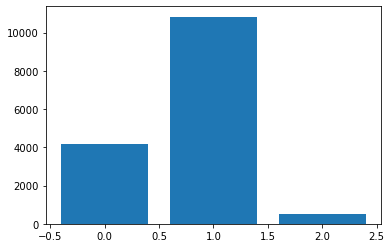

In [15]:
%matplotlib inline
plot_matches(corpus_test, take_sample=False)

In [45]:
display_similar_article_and_categories(corpus_test, doc_id=13317)

prittlewell railway station is on the shenfield to southend line in the east of england serving the residential district of prittlewell in southend on sea essex it is down the line from london liverpo
************
Get simlarity based on tokens:

0.4564360976219177 Railway stations in Essex
0.351457804441452 Rail transport in Essex
0.3364182710647583  Railway sidings in England
0.33188721537590027 Railway stations served by Transport for Wales Rail
0.32993584871292114 List of airlines of American Samoa
0.32987186312675476 Transportation in American Samoa
0.32979390025138855 Lists of organizations based in American Samoa
0.32366394996643066 List of defunct airlines of Anguilla
0.32359862327575684 Defunct airlines of Anguilla
0.32356804609298706 List of the busiest airports in South America
************
Actual known tags:

['Railway stations in Essex', 'Transport in Southend-on-Sea', 'Former Great Eastern Railway stations', 'Greater Anglia franchise railway stations', 'William Neville Ash

In [13]:
import pandas as pd
df_test = pd.read_csv('./test.csv')

In [14]:
df_test.iloc[5914]

Unnamed: 0                                                55801
id                                                     36032017
url           https://en.wikipedia.org/wiki?curid=36032017&o...
title                                            Jordan Airport
text          Jordan Airport is a county-owned, public-use a...
revid                                                1025286660
timestamp                                  2021-05-26T19:08:23Z
categories                                  Airports in Montana
Name: 5914, dtype: object

10476: Ranked 0 (ATP-binding cassette transporters) out of 170620
1824: Ranked 0 (American people in rail transportation) out of 170620
409: Ranked 16 (Ahmedabad railway division) out of 170620
12149: Ranked 11174 (Water transport in Spain) out of 170620
4506: Ranked 0 (Transport in Stockholm) out of 170620
4012: Ranked 1317 (Greek brands) out of 170620
3657: Ranked 992 (Disused railway stations in Kent) out of 170620
2286: Ranked 137 (Transport in Occitanie) out of 170620
12066: Ranked 175 (1988 deaths) out of 170620
1679: Ranked 2 (South Korean time travel television series) out of 170620
11087: Ranked 179 (Recipients of the Gold German Cross) out of 170620
12135: Ranked 1 (Rail transport in North Yorkshire) out of 170620
14617: Ranked 2843 (Transport in Townsville) out of 170620
8935: Ranked 5 (Documentary films about rail transport) out of 170620
1424: Ranked 0 (Transport ministers of Italy) out of 170620
9674: Ranked 354 (Airports in East Nusa Tenggara) out of 170620
6912: Ranked 

11762: Ranked 0 (Airports in Thailand) out of 170620
5155: Ranked 214 (Airports in Buenos Aires Province) out of 170620
3483: Ranked 862 (Airports in Western Australia) out of 170620
10738: Ranked 2 (Living people) out of 170620
8179: Ranked 0 (Transport in Greater Vancouver) out of 170620
6482: Ranked 124 (Airports built in the Soviet Union) out of 170620
14494: Ranked 14 (Proposed public transportation in the Philippines) out of 170620
14983: Ranked 7692 (Traffic law) out of 170620
10532: Ranked 0 (Living people) out of 170620
7517: Ranked 0 (Transportation in Philadelphia) out of 170620
2340: Ranked 139 (Airports in Baden-Württemberg) out of 170620
4339: Ranked 20547 (Paragliding) out of 170620
2287: Ranked 100 (Transport in Rouen) out of 170620
4040: Ranked 1812 (Aerospace museums in Ukraine) out of 170620
12205: Ranked 473 (Transport operators of the United Kingdom) out of 170620
9197: Ranked 278 (Airports in Ethiopia) out of 170620
8830: Ranked 153 (English cricketers) out of 170

8835: Ranked 405 (Aerospace museums in North Dakota) out of 170620
12374: Ranked 0 (Fantasy Flight Games games) out of 170620
11959: Ranked 4081 (Spaceflight by year) out of 170620
11302: Ranked 0 (Public transport in Melbourne) out of 170620
3295: Ranked 596 (Bus transportation in New Jersey) out of 170620
11680: Ranked 508 (Airlines established in 2001) out of 170620
5107: Ranked 0 (Isle of Man TT riders) out of 170620
6537: Ranked 361 (Train and subway fires) out of 170620
11004: Ranked 2744 (1903 births) out of 170620
6118: Ranked 0 (Travel Channel original programming) out of 170620
7177: Ranked 2953 (Aerospace research institutes) out of 170620
14739: Ranked 3 (Rail transport in Merseyside) out of 170620
8479: Ranked 0 (Living people) out of 170620
7397: Ranked 873 (Closed railways in Ireland) out of 170620
1982: Ranked 0 (Transports of the United States Navy) out of 170620
4061: Ranked 281 (Rail transport in Greater Manchester) out of 170620
3681: Ranked 0 (Airports in Kenya) ou

10844: Ranked 2263 (Port authorities) out of 170620
11770: Ranked 3 (Airports in Indiana) out of 170620
7973: Ranked 0 (Space telescopes) out of 170620
2536: Ranked 2223 (Transportation in New Orleans) out of 170620
3111: Ranked 0 (Transport in Buenos Aires) out of 170620
4861: Ranked 0 (United States Marine Corps air support squadrons) out of 170620
3566: Ranked 4 (Divisions of Indian Railways) out of 170620
958: Ranked 0 (5 ft 6 in gauge railways in India) out of 170620
9489: Ranked 0 (Palmas Futebol e Regatas players) out of 170620
12054: Ranked 7 (Living people) out of 170620
8883: Ranked 9 (Space flight simulator games) out of 170620
998: Ranked 94158 (2010 road incidents) out of 170620
12254: Ranked 10 (Living people) out of 170620
5138: Ranked 5 (Aviation accidents and incidents in Norway) out of 170620
936: Ranked 0 (Airports in Texas) out of 170620
821: Ranked 18 (Vesicular transport proteins) out of 170620
9571: Ranked 2 (British travel books) out of 170620
7811: Ranked 10 (R

12634: Ranked 2240 (Rail transport films) out of 170620
2143: Ranked 752 (Religious tourism in India) out of 170620
10438: Ranked 7 (Types of tourism) out of 170620
4291: Ranked 1244 (Recipients of the Order of the Red Banner) out of 170620
2647: Ranked 0 (Passenger rail transport in China) out of 170620
12144: Ranked 2 (Airports in Illinois) out of 170620
7239: Ranked 63 (Transport in Sendai) out of 170620
9038: Ranked 0 (Tourism in Uttarakhand) out of 170620
11561: Ranked 5 (Airports in Ohio) out of 170620
7007: Ranked 1 (Rail transport in Gloucestershire) out of 170620
9189: Ranked 1398 (1970s in transport) out of 170620
158: Ranked 11 (Privately held companies of Malaysia) out of 170620
1232: Ranked 6 (Films about time travel) out of 170620
15483: Ranked 3 (Transit agencies in Ontario) out of 170620
14468: Ranked 9 (Streetcar strikes in the United States) out of 170620
11321: Ranked 12 (Express trains in India) out of 170620
14809: Ranked 0 (Combat flight simulators) out of 170620


7144: Ranked 312 (Airports in Tanganyika Province) out of 170620
27: Ranked 0 (Airports in Alabama) out of 170620
8518: Ranked 79 (Bus companies of Japan) out of 170620
15164: Ranked 601 (American travel writers) out of 170620
13213: Ranked 664 (Piers on the National Register of Historic Places) out of 170620
8821: Ranked 223 (Chinese aerospace engineers) out of 170620
11253: Ranked 22 (Airports in Kansas) out of 170620
11787: Ranked 6 (American films) out of 170620
15405: Ranked 36 (Adventure tourism in India) out of 170620
12156: Ranked 187 (Aerospace museums in England) out of 170620
12075: Ranked 0 (Living people) out of 170620
10987: Ranked 11 (Airports in Bangladesh) out of 170620
3228: Ranked 3279 (Pedestrian tunnels in the United States) out of 170620
5967: Ranked 0 (Living people) out of 170620
7066: Ranked 122 (Missions to Venus) out of 170620
1146: Ranked 301 (Public transport in South Australia) out of 170620
15546: Ranked 0 (1067 mm gauge railways in Japan) out of 170620
1

2184: Ranked 0 (Airports in Greece) out of 170620
13130: Ranked 1128 (Defunct airlines of Kyrgyzstan) out of 170620
7612: Ranked 1629 (Aviation accidents and incidents in 2007) out of 170620
10937: Ranked 2496 (1992 deaths) out of 170620
8702: Ranked 0 (Mississippi River locks) out of 170620
9157: Ranked 33 (American people in rail transportation) out of 170620
9755: Ranked 50 (Aviation accidents and incidents in Scotland) out of 170620
5198: Ranked 123 (Palmas Futebol e Regatas players) out of 170620
15565: Ranked 0 (Ministry of War Transport ships) out of 170620
14605: Ranked 0 (Little Rock Travelers players) out of 170620
7251: Ranked 731 (Airlines established in 1947) out of 170620
10037: Ranked 2238 (French films) out of 170620
13353: Ranked 1 (Hindu pilgrimages) out of 170620
11784: Ranked 58 (Aviation safety) out of 170620
14614: Ranked 429 (Rail transport in Staffordshire) out of 170620
8270: Ranked 0 (Airports in Ohio) out of 170620
6991: Ranked 641 (2005 deaths) out of 170620

3467: Ranked 233 (Tourism in Madhya Pradesh) out of 170620
7449: Ranked 0 (Tourism agencies) out of 170620
5355: Ranked 2 (Airports in Sweden) out of 170620
5529: Ranked 5 (Living people) out of 170620
12471: Ranked 1 (Airfields of the United States Army Air Forces in China) out of 170620
14412: Ranked 612 (Airlines established in 2014) out of 170620
4558: Ranked 282 (Water transport in Germany) out of 170620
12320: Ranked 152 (2015 in spaceflight) out of 170620
15584: Ranked 891 (2000 deaths) out of 170620
13630: Ranked 22 (Indian aerospace engineers) out of 170620
6906: Ranked 0 (Living people) out of 170620
4133: Ranked 0 (Airports in Suriname) out of 170620
13679: Ranked 2 (Expressways in Japan) out of 170620
1341: Ranked 130 (Airports in Virginia) out of 170620
7705: Ranked 455 (American films) out of 170620
317: Ranked 0 (Living people) out of 170620
12272: Ranked 4 (Road transport in Japan) out of 170620
853: Ranked 403 (17th-century travel writers) out of 170620
15596: Ranked 0

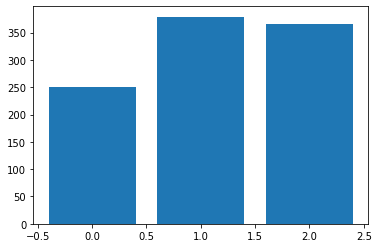

In [15]:
%matplotlib inline
plot_matches(corpus_test, sample_size=1000)

10476: Ranked 0 (ATP-binding cassette transporters) out of 170620
1824: Ranked 0 (American people in rail transportation) out of 170620
409: Ranked 13 (Ahmedabad railway division) out of 170620
12149: Ranked 9878 (Water transport in Spain) out of 170620
4506: Ranked 0 (Transport in Stockholm) out of 170620
4012: Ranked 1550 (Greek brands) out of 170620
3657: Ranked 1023 (Disused railway stations in Kent) out of 170620
2286: Ranked 103 (Transport in Occitanie) out of 170620
12066: Ranked 241 (1988 deaths) out of 170620
1679: Ranked 2 (South Korean time travel television series) out of 170620
11087: Ranked 137 (Recipients of the Gold German Cross) out of 170620
12135: Ranked 1 (Rail transport in North Yorkshire) out of 170620
14617: Ranked 2785 (Transport in Townsville) out of 170620
8935: Ranked 8 (Documentary films about rail transport) out of 170620
1424: Ranked 0 (Transport ministers of Italy) out of 170620
9674: Ranked 379 (Airports in East Nusa Tenggara) out of 170620
6912: Ranked 

11762: Ranked 0 (Airports in Thailand) out of 170620
5155: Ranked 246 (Airports in Buenos Aires Province) out of 170620
3483: Ranked 972 (Airports in Western Australia) out of 170620
10738: Ranked 3 (English travel writers) out of 170620
8179: Ranked 0 (Transport in Greater Vancouver) out of 170620
6482: Ranked 136 (Airports built in the Soviet Union) out of 170620
14494: Ranked 18 (Proposed public transportation in the Philippines) out of 170620
14983: Ranked 7750 (Traffic law) out of 170620
10532: Ranked 0 (Living people) out of 170620
7517: Ranked 0 (Transportation in Philadelphia) out of 170620
2340: Ranked 86 (Airports in Baden-Württemberg) out of 170620
4339: Ranked 16431 (Paragliding) out of 170620
2287: Ranked 110 (Transport in Rouen) out of 170620
4040: Ranked 1896 (Aerospace museums in Ukraine) out of 170620
12205: Ranked 572 (Transport operators of the United Kingdom) out of 170620
9197: Ranked 270 (Airports in Ethiopia) out of 170620
8830: Ranked 113 (English cricketers) ou

8835: Ranked 368 (Aerospace museums in North Dakota) out of 170620
12374: Ranked 0 (Fantasy Flight Games games) out of 170620
11959: Ranked 4147 (Spaceflight by year) out of 170620
11302: Ranked 0 (Public transport in Melbourne) out of 170620
3295: Ranked 333 (Bus transportation in New Jersey) out of 170620
11680: Ranked 429 (Airlines established in 2001) out of 170620
5107: Ranked 0 (Isle of Man TT riders) out of 170620
6537: Ranked 373 (Train and subway fires) out of 170620
11004: Ranked 3412 (1903 births) out of 170620
6118: Ranked 0 (Travel Channel original programming) out of 170620
7177: Ranked 3453 (Aerospace research institutes) out of 170620
14739: Ranked 3 (Rail transport in Merseyside) out of 170620
8479: Ranked 0 (Living people) out of 170620
7397: Ranked 1086 (Closed railways in Ireland) out of 170620
1982: Ranked 0 (Transports of the United States Navy) out of 170620
4061: Ranked 309 (Rail transport in Greater Manchester) out of 170620
3681: Ranked 0 (Airports in Kenya) o

9105: Ranked 0 (Bus companies of Trøndelag) out of 170620
10844: Ranked 2624 (Port authorities) out of 170620
11770: Ranked 2 (Airports in Indiana) out of 170620
7973: Ranked 0 (Space telescopes) out of 170620
2536: Ranked 1942 (Transportation in New Orleans) out of 170620
3111: Ranked 0 (Transport in Buenos Aires) out of 170620
4861: Ranked 0 (United States Marine Corps air support squadrons) out of 170620
3566: Ranked 4 (Divisions of Indian Railways) out of 170620
958: Ranked 0 (5 ft 6 in gauge railways in India) out of 170620
9489: Ranked 0 (Palmas Futebol e Regatas players) out of 170620
12054: Ranked 10 (Living people) out of 170620
8883: Ranked 16 (Space flight simulator games) out of 170620
998: Ranked 99639 (2010 road incidents) out of 170620
12254: Ranked 8 (Living people) out of 170620
5138: Ranked 3 (Aviation accidents and incidents in Norway) out of 170620
936: Ranked 0 (Airports in Texas) out of 170620
821: Ranked 9 (Vesicular transport proteins) out of 170620
9571: Ranked

5464: Ranked 0 (Norsk Transport locomotives) out of 170620
12634: Ranked 1725 (Rail transport films) out of 170620
2143: Ranked 733 (Religious tourism in India) out of 170620
10438: Ranked 4 (Types of tourism) out of 170620
4291: Ranked 1290 (Recipients of the Order of the Red Banner) out of 170620
2647: Ranked 0 (Passenger rail transport in China) out of 170620
12144: Ranked 1 (Airports in Illinois) out of 170620
7239: Ranked 69 (Transport in Sendai) out of 170620
9038: Ranked 0 (Tourism in Uttarakhand) out of 170620
11561: Ranked 7 (Airports in Ohio) out of 170620
7007: Ranked 1 (Rail transport in Gloucestershire) out of 170620
9189: Ranked 1433 (1970s in transport) out of 170620
158: Ranked 18 (Privately held companies of Malaysia) out of 170620
1232: Ranked 5 (Films about time travel) out of 170620
15483: Ranked 3 (Transit agencies in Ontario) out of 170620
14468: Ranked 14 (Streetcar strikes in the United States) out of 170620
11321: Ranked 11 (Express trains in India) out of 1706

11612: Ranked 20 (Aerospace companies) out of 170620
7144: Ranked 380 (Airports in Tanganyika Province) out of 170620
27: Ranked 0 (Airports in Alabama) out of 170620
8518: Ranked 45 (Bus companies of Japan) out of 170620
15164: Ranked 565 (American travel writers) out of 170620
13213: Ranked 583 (Piers on the National Register of Historic Places) out of 170620
8821: Ranked 168 (Chinese aerospace engineers) out of 170620
11253: Ranked 20 (Airports in Kansas) out of 170620
11787: Ranked 5 (American films) out of 170620
15405: Ranked 45 (Adventure tourism in India) out of 170620
12156: Ranked 137 (Aerospace museums in England) out of 170620
12075: Ranked 0 (Living people) out of 170620
10987: Ranked 17 (Airports in Bangladesh) out of 170620
3228: Ranked 3709 (Pedestrian tunnels in the United States) out of 170620
5967: Ranked 0 (Living people) out of 170620
7066: Ranked 283 (Missions to Venus) out of 170620
1146: Ranked 301 (Public transport in South Australia) out of 170620
15546: Ranke

2184: Ranked 0 (Airports in Greece) out of 170620
13130: Ranked 1121 (Defunct airlines of Kyrgyzstan) out of 170620
7612: Ranked 1433 (Aviation accidents and incidents in 2007) out of 170620
10937: Ranked 2630 (1992 deaths) out of 170620
8702: Ranked 0 (Mississippi Valley Division) out of 170620
9157: Ranked 110 (American people in rail transportation) out of 170620
9755: Ranked 39 (Aviation accidents and incidents in Scotland) out of 170620
5198: Ranked 133 (Palmas Futebol e Regatas players) out of 170620
15565: Ranked 0 (Ministry of War Transport ships) out of 170620
14605: Ranked 1 (Little Rock Travelers players) out of 170620
7251: Ranked 723 (Airlines established in 1947) out of 170620
10037: Ranked 2668 (French films) out of 170620
13353: Ranked 0 (Hindu pilgrimages) out of 170620
11784: Ranked 46 (Aviation safety) out of 170620
14614: Ranked 485 (Rail transport in Staffordshire) out of 170620
8270: Ranked 0 (Airports in Ohio) out of 170620
6991: Ranked 696 (2005 deaths) out of 1

5363: Ranked 5 (Motor vehicle manufacturing plants on the National Register of Historic Places) out of 170620
3467: Ranked 209 (Tourism in Madhya Pradesh) out of 170620
7449: Ranked 0 (Tourism agencies) out of 170620
5355: Ranked 1 (Airports in Sweden) out of 170620
5529: Ranked 8 (Living people) out of 170620
12471: Ranked 0 (Airfields of the United States Army Air Forces in China) out of 170620
14412: Ranked 535 (Airlines established in 2014) out of 170620
4558: Ranked 331 (Water transport in Germany) out of 170620
12320: Ranked 239 (2015 in spaceflight) out of 170620
15584: Ranked 1066 (2000 deaths) out of 170620
13630: Ranked 13 (Indian aerospace engineers) out of 170620
6906: Ranked 2 (Living people) out of 170620
4133: Ranked 0 (Airports in Suriname) out of 170620
13679: Ranked 2 (Expressways in Japan) out of 170620
1341: Ranked 198 (Airports in Virginia) out of 170620
7705: Ranked 364 (American films) out of 170620
317: Ranked 0 (Living people) out of 170620
12272: Ranked 2 (Roa

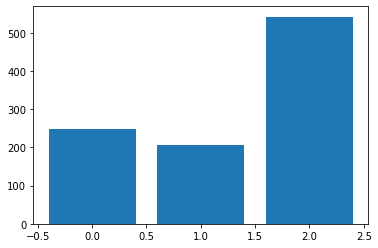

In [16]:
%matplotlib inline
plot_matches(corpus_test, sample_size=1000, topn_perc=0.01)